In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

### Features para Umidade relativa

In [2]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = ['Altitude(metros)',
                         'Latitude',
                         'Longitude',
                         'TEMPERATURA MAXIMA (C)',
                        'TEMPERATURA MINIMA (C)']
features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

### Criando o dataframe que ira guardar os valores d

In [3]:
data_ur_erros = pd.DataFrame(columns=['Month','Qto_Estacioes','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE'])

### Pegando as base de dados do primeiro mês


In [4]:
data_mean_jan = pd.read_csv('../Dados/Brasil_1_mean.csv')

In [25]:
data_mean_jan.describe().T

count          mean          std  \
Altitude(metros)                            458.0    365.521834   282.831588   
Codigo OMM                                  458.0  85201.056769  2325.371846   
Day                                         458.0     15.927174     0.283932   
H(UTC)                                      458.0     11.587590     0.172818   
Latitude                                    458.0    -15.371909     8.276341   
Longitude                                   458.0    -48.015097     7.263208   
Month                                       458.0      1.000000     0.000000   
PRECIPITACAO (mm)                           458.0      0.248918     0.118368   
PRESSAO ATMOSFERICA (hPa)                   458.0    970.463632    31.018293   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            458.0    970.749562    31.026400   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            458.0    970.182033    31.011770   
TEMPERATURA DO AR (C)                       458.0     25.166107     1.786796   
TEMPERATURA DO PONTO DE ORVALHO (C)         458.0     20.009061     1.893327   
TEMPERATURA MAXIMA (C)                      458.0     25.790517     1.775655   
TEMPERATURA MINIMA (C)                      458.0     24.578979     1.801156   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  458.0     20.556930     1.848208   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  458.0     19.489344     1.940896   
UMIDADE RELATIVA DO AR (%)                  458.0     75.702368     6.989880   
UMIDADE RELATIVA DO MAXIMA AR (%)           458.0     78.554017     6.832995   
UMIDADE RELATIVA DO MINIMA AR (%)           458.0     72.736567     7.117130   
Year                                        458.0   2012.058623     1.237797   

                                                     min           25%  \
Altitude(metros)                                2.000000    108.250000   
Codigo OMM                                  81609.000000  81950.250000   
Day                                            12.296099     15.858514   
H(UTC)                                         11.338053     11.497550   
Latitude                                      -33.742297    -21.949157   
Longitude                                     -72.786778    -52.955566   
Month                                           1.000000      1.000000   
PRECIPITACAO (mm)                               0.014519      0.161988   
PRESSAO ATMOSFERICA (hPa)                     902.892063    949.023218   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              903.143750    949.286285   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              902.640961    948.758473   
TEMPERATURA DO AR (C)                          19.854811     24.112123   
TEMPERATURA DO PONTO DE ORVALHO (C)            15.718951     18.488906   
TEMPERATURA MAXIMA (C)                         20.548823     24.719783   
TEMPERATURA MINIMA (C)                         19.184433     23.467741   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     16.350589     19.082854   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     15.129963     17.931352   
UMIDADE RELATIVA DO AR (%)                     52.336253     72.550838   
UMIDADE RELATIVA DO MAXIMA AR (%)              54.664477     75.355683   
UMIDADE RELATIVA DO MINIMA AR (%)              49.652330     69.357191   
Year                                         2008.524291   2011.500500   

                                                     50%           75%  \
Altitude(metros)                              318.500000    557.250000   
Codigo OMM                                  86710.000000  86854.750000   
Day                                            15.997478     16.003929   
H(UTC)                                         11.509815     11.619378   
Latitude                                      -15.290187     -8.505388   
Longitude                                     -48.228444    -42.155827   
Month                                           1.000000      1.000000   
PRECIPITACAO (mm)                               0.230883      

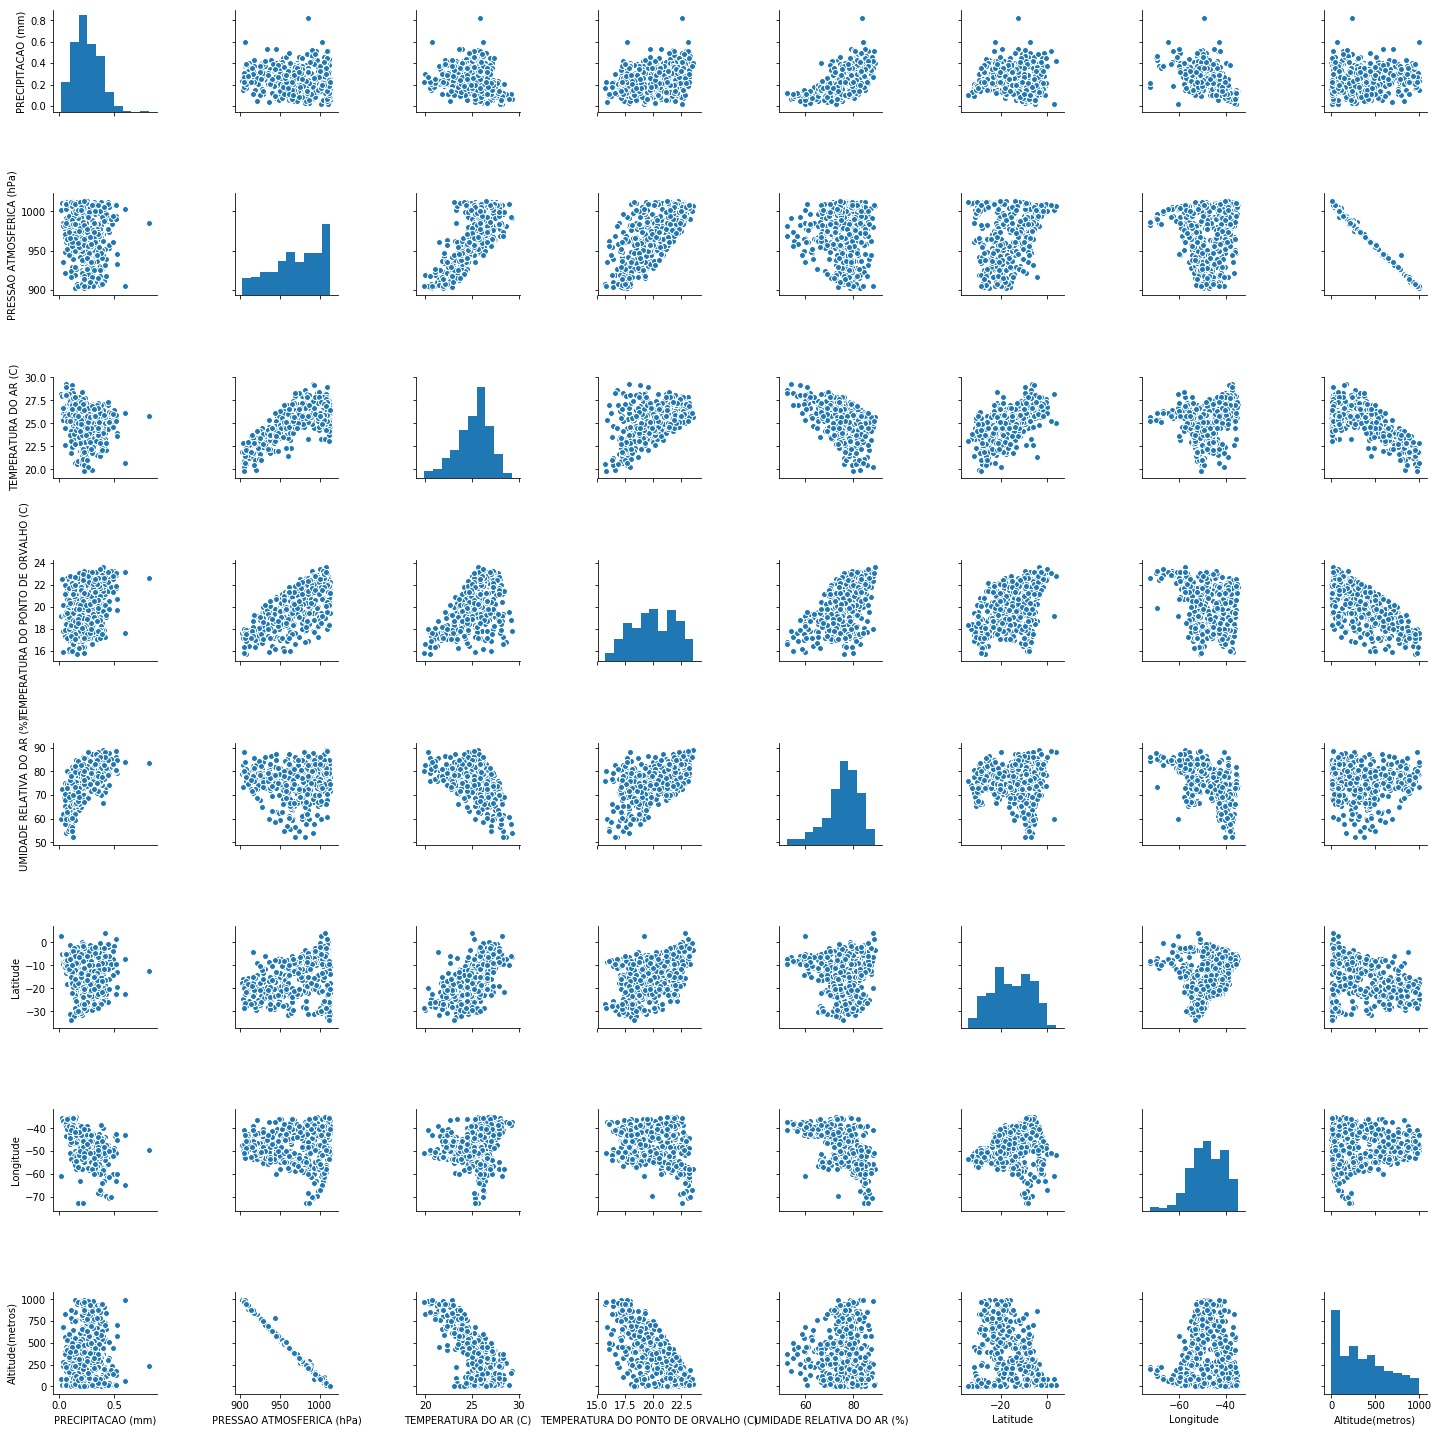

In [6]:
sns.pairplot(data_mean_jan[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jan[features_UR_wanderlay], 
                                                    data_mean_jan[target_wanderlay],test_size=.3)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)


mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), 
                   activation='logistic', solver='lbfgs', alpha=0.0001, 
                   batch_size='auto',learning_rate='constant', learning_rate_init=0.09,
                   power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, 
                   warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                   beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9137407981530812
MAE: 1.6742338740898546
MSE: 4.361444758180413
MSLE: 0.0008010585921403624
MedLE: 1.358151168066172
R2 Score: 0.9120366633451882
Error(UR_true - UR_pred)
MIN: 0.005650169587539722 	MAX: 5.6951311163362135 	MEAN: 1.6742338740898546	Std: 1.2483531924221165


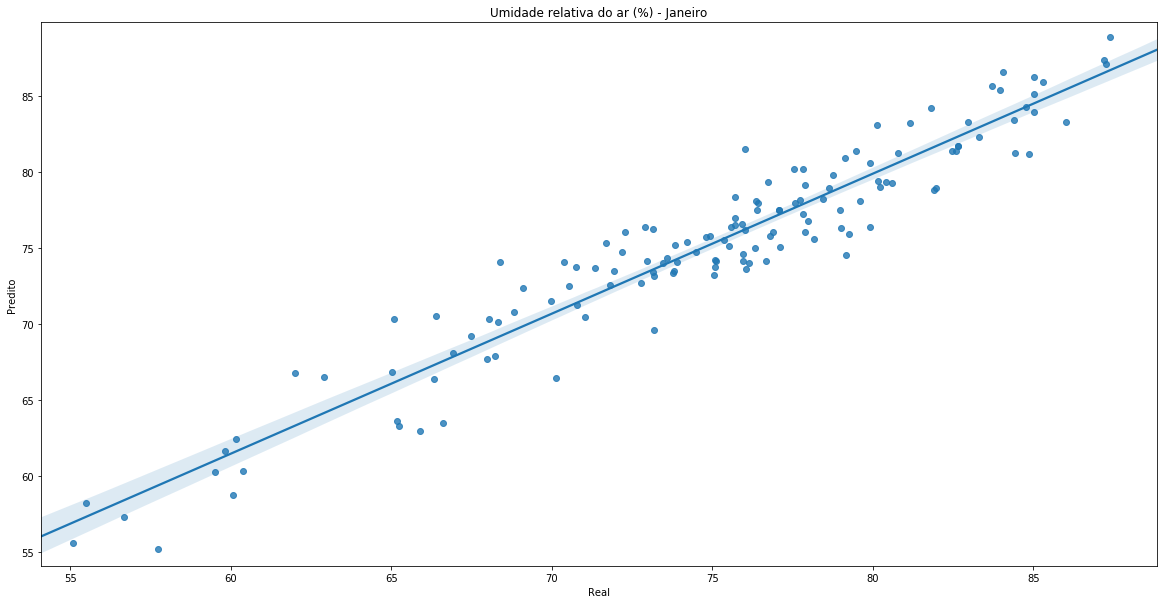

In [94]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Janeiro')
plt.savefig('../Validacao/graph/UR_jan.png')

In [95]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[1]=['Janeiro',len(data_mean_jan),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min    ER_max    ER_std  Variance  \
1    Janeiro            458  1.674234  0.005650  5.695131  1.248353  0.913741   
2  Fevereiro            458  1.526640  0.031749  7.977397  1.585029  0.890031   
3      Março            458  1.895129  0.033747  6.112617  1.399399  0.890115   

   R2_score       MAE       MSE      MSLE     MedLE  
1  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.889683  1.526640  4.842946  0.000844  1.039741  
3  0.888655  1.895129  5.549833  0.000996  1.624864

In [96]:
pickle.dump(mlp,open('../Models/UR/ur_1.model','wb'))

## Fevereiro

In [16]:
data_mean_fev = pd.read_csv('../Dados/Brasil_2_mean.csv')
data_mean_fev.head(5)

Nome  Altitude(metros)  Codigo OMM        Day     H(UTC)  \
0        Abrolhos-A422              21.0     86765.0  14.342558  11.526834   
1          Acaraú-A360              67.0     81755.0  14.646465  11.500000   
2  Afonso Cláudio-A657             507.0     86827.0  14.754386  11.500000   
3         Aimorés-A534             288.0     86803.0  14.638834  11.519928   
4          Alegre-A617             129.0     86828.0  14.653897  11.504052   

    Latitude  Longitude  Month  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
0 -17.963016 -38.703288    2.0           0.062558                1011.875577   
1  -3.121067 -40.087288    2.0           0.167845                1003.145665   
2 -20.104194 -41.106861    2.0           0.136330                 956.387573   
3 -19.532768 -41.090801    2.0           0.087022                 985.983070   
4 -20.750412 -41.488852    2.0           0.146368                 997.771239   

      ...       TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0     ...                   27.061635                            22.703732   
1     ...                   26.763510                            22.455934   
2     ...                   25.172844                            18.401060   
3     ...                   26.704447                            19.654924   
4     ...                   27.041579                            19.732518   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0               27.438134               26.707338   
1               27.345918               26.229398   
2               26.209064               24.245431   
3               27.470438               25.996772   
4               27.838544               26.311581   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                   23.128386   
1                                   22.874327   
2                                   19.216484   
3                                   20.279677   
4                                   20.373567   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                   22.295178                   77.356604   
1                                   22.052125                   79.125421   
2                                   17.651133                   68.985015   
3                                   19.046690                   68.021245   
4                                   19.147075                   68.221600   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                          79.134382                          75.533124   
1                          81.441709                          76.664352   
2                          72.372076                          65.493421   
3                          71.030468                          64.930830   
4                          71.498895                          64.898188   

          Year  
0  2012.864990  
1  2013.010101  
2  2014.245614  
3  2012.005105  
4  2011.506999  

[5 rows x 22 columns]

In [18]:
data_mean_fev.describe().T

count          mean          std  \
Altitude(metros)                            458.0    365.041836   283.263611   
Codigo OMM                                  458.0  85211.521834  2321.364258   
Day                                         458.0     14.716247     0.347290   
H(UTC)                                      458.0     11.575303     0.182531   
Latitude                                    458.0    -15.386842     8.270897   
Longitude                                   458.0    -47.960816     7.169973   
Month                                       458.0      2.000000     0.000000   
PRECIPITACAO (mm)                           458.0      0.228806     0.118518   
PRESSAO ATMOSFERICA (hPa)                   458.0    970.632334    30.900937   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            458.0    970.655625    31.099888   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            458.0    970.077796    31.080350   
TEMPERATURA DO AR (C)                       458.0     25.282363     1.681078   
TEMPERATURA DO PONTO DE ORVALHO (C)         458.0     20.164342     1.907737   
TEMPERATURA MAXIMA (C)                      458.0     25.899000     1.666223   
TEMPERATURA MINIMA (C)                      458.0     24.664917     1.695128   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  458.0     20.719062     1.859946   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  458.0     19.638557     1.958584   
UMIDADE RELATIVA DO AR (%)                  458.0     75.893052     6.943851   
UMIDADE RELATIVA DO MAXIMA AR (%)           458.0     78.822197     6.708873   
UMIDADE RELATIVA DO MINIMA AR (%)           458.0     72.898845     7.152496   
Year                                        458.0   2011.965789     1.331216   

                                                     min           25%  \
Altitude(metros)                                1.161000    104.750000   
Codigo OMM                                  81609.000000  81951.250000   
Day                                            13.441386     14.582174   
H(UTC)                                         10.000000     11.500000   
Latitude                                      -33.742297    -21.949157   
Longitude                                     -72.747838    -52.921473   
Month                                           2.000000      2.000000   
PRECIPITACAO (mm)                               0.000000      0.139196   
PRESSAO ATMOSFERICA (hPa)                     903.079480    949.438490   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              887.633333    949.339697   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              887.066667    948.784529   
TEMPERATURA DO AR (C)                          20.288039     24.360339   
TEMPERATURA DO PONTO DE ORVALHO (C)            15.090420     18.690571   
TEMPERATURA MAXIMA (C)                         20.994139     24.989159   
TEMPERATURA MINIMA (C)                         19.623604     23.712463   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     16.202478     19.296980   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     14.106937     18.113816   
UMIDADE RELATIVA DO AR (%)                     50.870694     72.128731   
UMIDADE RELATIVA DO MAXIMA AR (%)              54.859604     75.511773   
UMIDADE RELATIVA DO MINIMA AR (%)              47.336951     68.935966   
Year                                         2005.000000   2011.460652   

                                                     50%           75%  \
Altitude(metros)                              318.500000    557.250000   
Codigo OMM                                  86711.500000  86854.750000   
Day                                            14.657739     14.823101   
H(UTC)                                         11.516221     11.607779   
Latitude                                      -15.312444     -8.505388   
Longitude                                     -48.193060    -42.155827   
Month                                           2.000000      2.000000   
PRECIPITACAO (mm)                               0.219439      

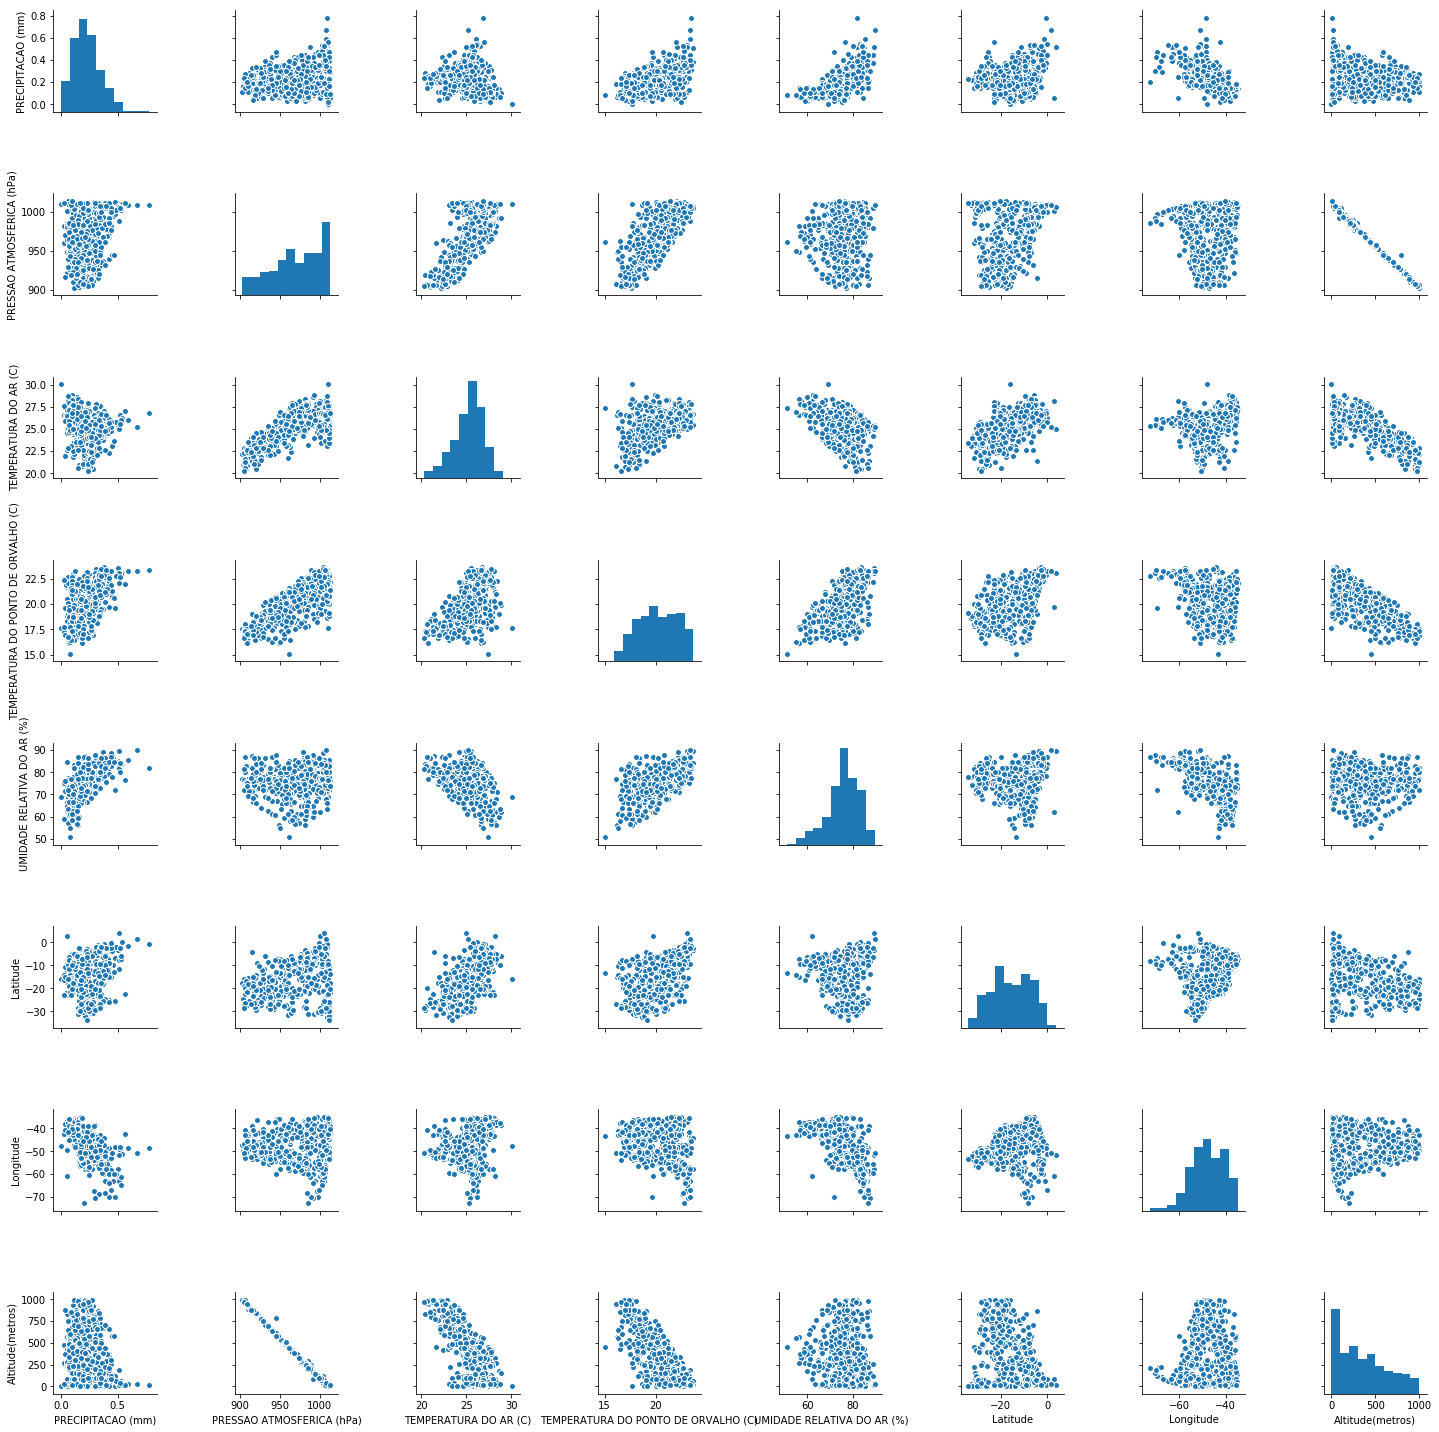

In [19]:
sns.pairplot(data_mean_fev[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [153]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_fev[features_UR_wanderlay], 
                                                    data_mean_fev[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.8906479725728137
MAE: 1.5478160789100357
MSE: 4.751421592714858
MSLE: 0.0008208545869482011
MedLE: 0.9730382195904639
R2 Score: 0.8860235384859318
Error(UR_true - UR_pred)
MIN: 8.366720452102072e-05 	MAX: 6.132166480711206 	MEAN: 1.5478160789100357	Std: 1.5348247387185345


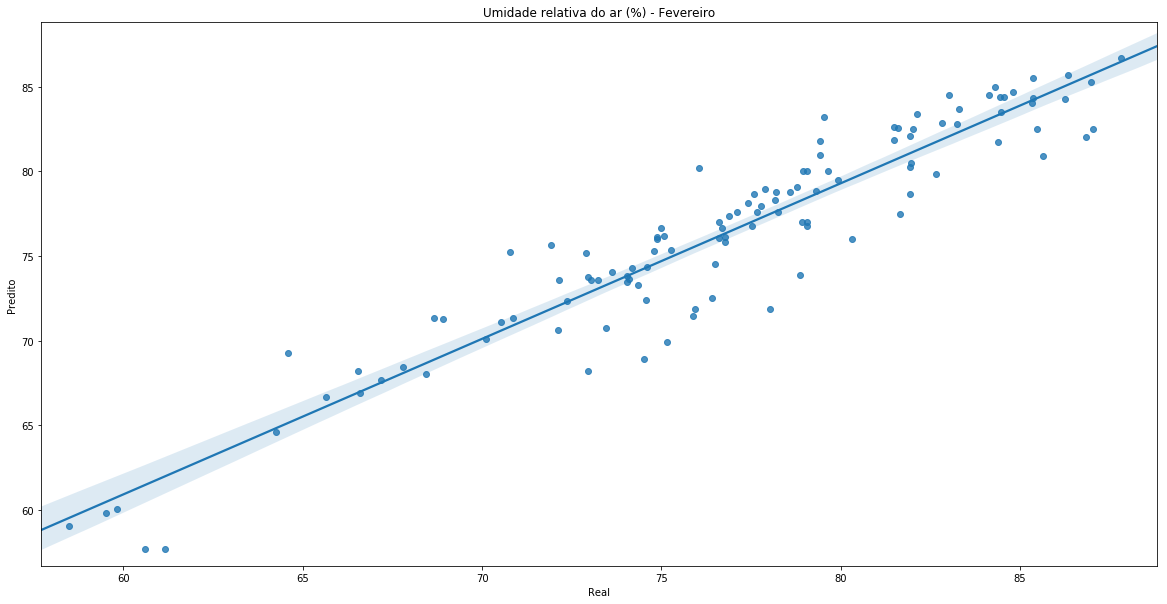

In [155]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min()),max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Fevereiro')
plt.savefig('../Validacao/graph/UR_fev.png')

In [106]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[2]=['Fevereiro',len(data_mean_fev),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min    ER_max    ER_std  Variance  \
1    Janeiro            458  1.674234  0.005650  5.695131  1.248353  0.913741   
2  Fevereiro            458  1.673254  0.014731  6.544560  1.390854  0.902203   
3      Março            458  1.895129  0.033747  6.112617  1.399399  0.890115   

   R2_score       MAE       MSE      MSLE     MedLE  
1  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.888655  1.895129  5.549833  0.000996  1.624864

In [107]:
pickle.dump(mlp,open('../Models/UR/ur_2.model','wb'))

## Março

In [108]:
data_mean_mar = pd.read_csv('../Dados/Brasil_3_mean.csv')

In [109]:
data_mean_mar.describe().T

count          mean          std  \
Altitude(metros)                            458.0    365.521834   282.831588   
Codigo OMM                                  458.0  85201.056769  2325.371846   
Day                                         458.0     16.040708     0.567796   
H(UTC)                                      458.0     11.562026     0.142580   
Latitude                                    458.0    -15.371909     8.276341   
Longitude                                   458.0    -48.015097     7.263208   
Month                                       458.0      3.000000     0.000000   
PRECIPITACAO (mm)                           458.0      0.233774     0.120631   
PRESSAO ATMOSFERICA (hPa)                   458.0    971.032329    30.940823   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            458.0    971.324430    30.954617   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            458.0    970.742490    30.928821   
TEMPERATURA DO AR (C)                       458.0     24.845138     2.107364   
TEMPERATURA DO PONTO DE ORVALHO (C)         458.0     20.082610     2.209935   
TEMPERATURA MAXIMA (C)                      458.0     25.462898     2.098516   
TEMPERATURA MINIMA (C)                      458.0     24.264598     2.118605   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  458.0     20.611891     2.178833   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  458.0     19.580406     2.243949   
UMIDADE RELATIVA DO AR (%)                  458.0     77.226385     6.541520   
UMIDADE RELATIVA DO MAXIMA AR (%)           458.0     80.006527     6.338988   
UMIDADE RELATIVA DO MINIMA AR (%)           458.0     74.318488     6.717542   
Year                                        458.0   2011.927074     1.310697   

                                                     min           25%  \
Altitude(metros)                                2.000000    108.250000   
Codigo OMM                                  81609.000000  81950.250000   
Day                                            14.530171     15.904915   
H(UTC)                                         11.265600     11.497208   
Latitude                                      -33.742297    -21.949157   
Longitude                                     -72.786778    -52.955565   
Month                                           3.000000      3.000000   
PRECIPITACAO (mm)                               0.025538      0.150367   
PRESSAO ATMOSFERICA (hPa)                     903.204705    949.782916   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              903.464998    950.079018   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              902.942219    949.497964   
TEMPERATURA DO AR (C)                          17.944418     23.557117   
TEMPERATURA DO PONTO DE ORVALHO (C)            14.172366     18.408952   
TEMPERATURA MAXIMA (C)                         18.617067     24.184033   
TEMPERATURA MINIMA (C)                         17.317580     22.986510   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     14.760699     18.935538   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     13.619562     17.871061   
UMIDADE RELATIVA DO AR (%)                     50.641129     74.273068   
UMIDADE RELATIVA DO MAXIMA AR (%)              53.309140     77.211379   
UMIDADE RELATIVA DO MINIMA AR (%)              47.989247     70.959614   
Year                                         2007.876050   2011.461863   

                                                     50%           75%  \
Altitude(metros)                              318.500000    557.250000   
Codigo OMM                                  86710.000000  86854.750000   
Day                                            15.973041     16.159549   
H(UTC)                                         11.510513     11.585007   
Latitude                                      -15.290187     -8.505388   
Longitude                                     -48.228444    -42.155827   
Month                                           3.000000      3.000000   
PRECIPITACAO (mm)                               0.207366      

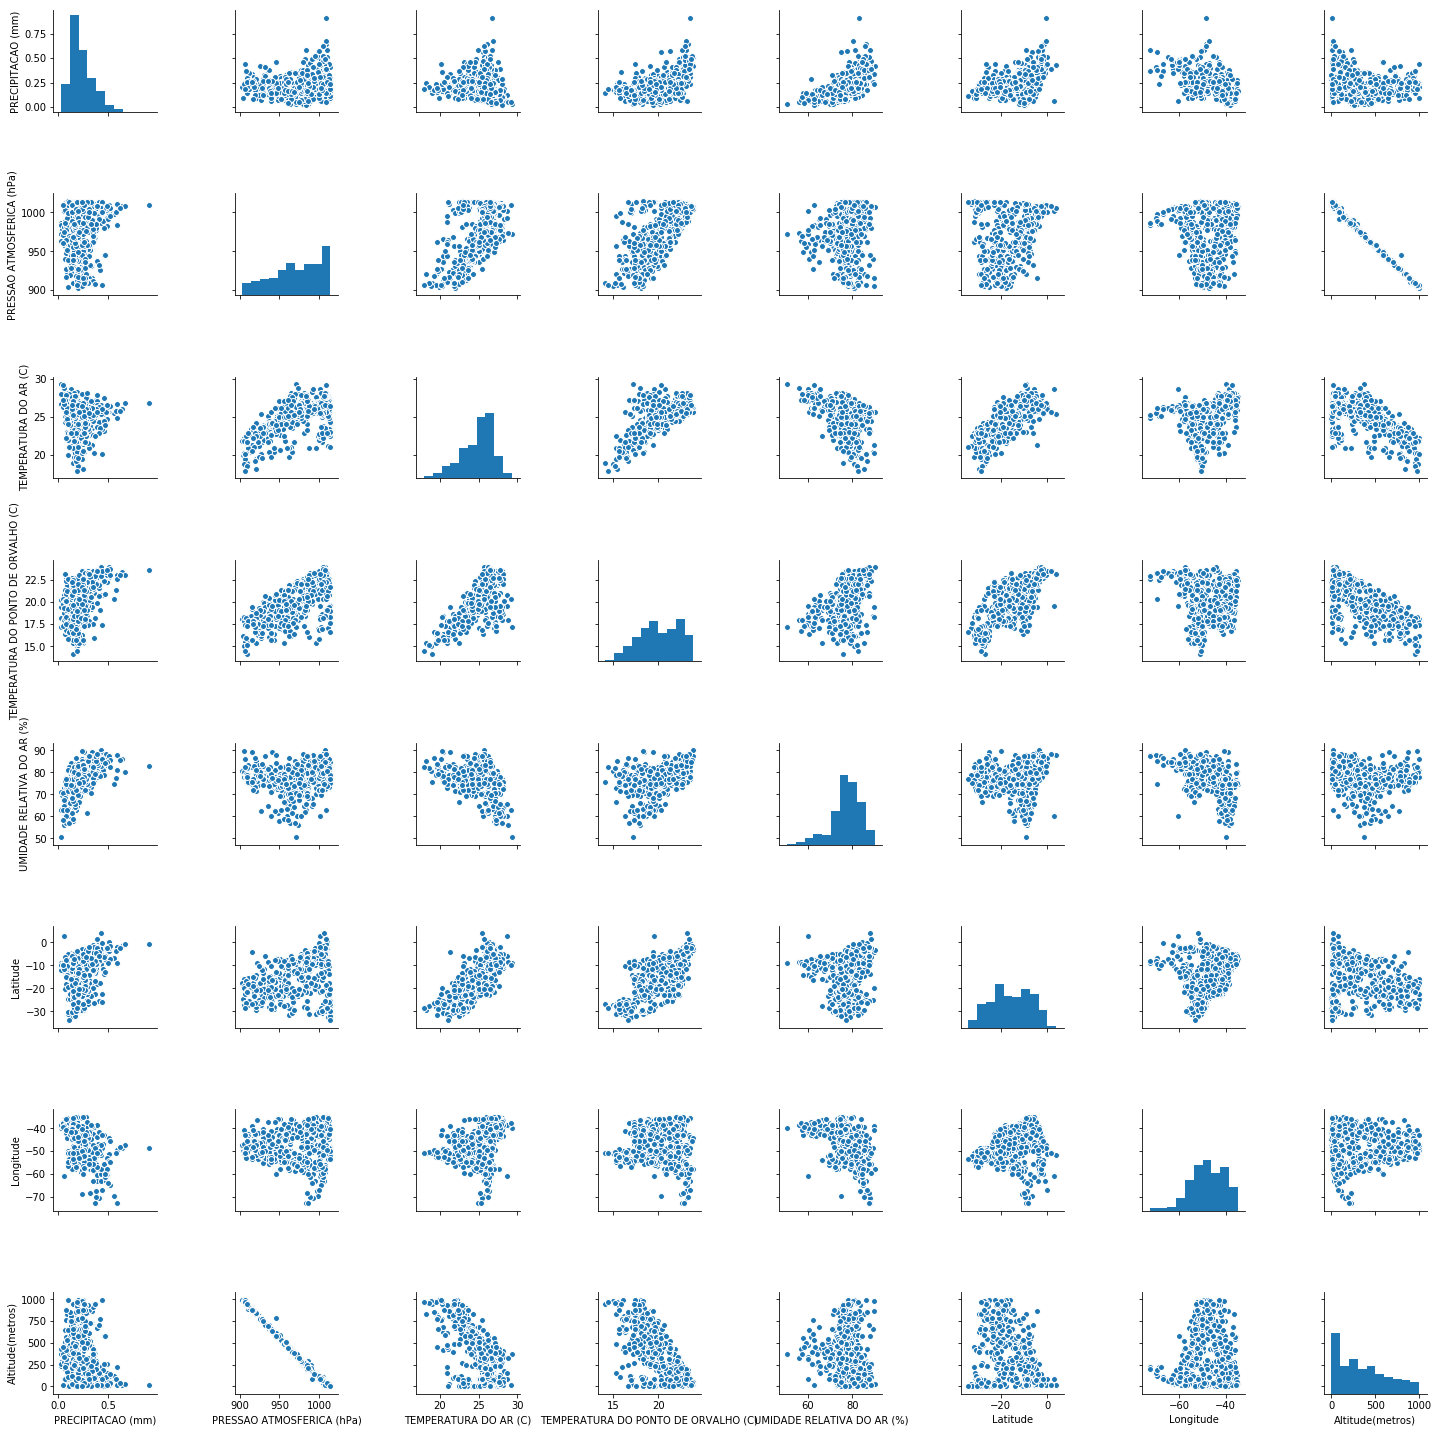

In [35]:
sns.pairplot(data_mean_mar[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mar[features_UR_wanderlay], 
                                                    data_mean_mar[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9282583103728951
MAE: 1.491297054100611
MSE: 3.493706299228623
MSLE: 0.0006124896489399008
MedLE: 1.166641872121275
R2 Score: 0.9277584001073506

Error(UR_true - UR_pred)

MIN: 0.04747019277742481 
MAX: 5.666158736460147 
MEAN: 1.491297054100611
Std: 1.1268271365473326


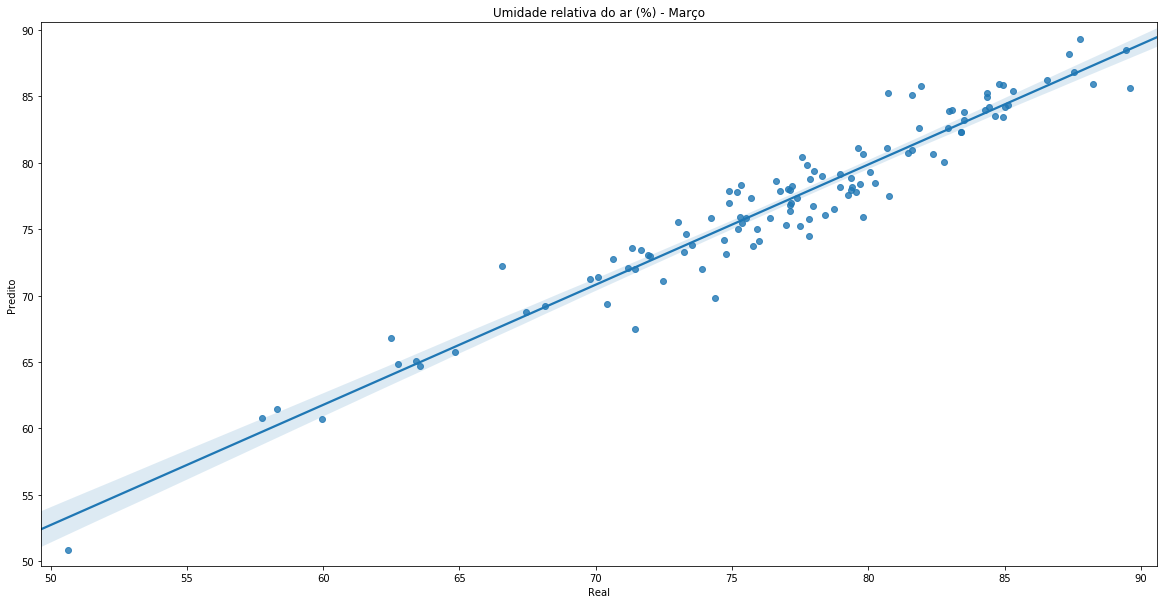

In [113]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Março')
plt.savefig('../Validacao/graph/UR_mar.png')

In [156]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[3]=['Março',len(data_mean_mar),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min    ER_max    ER_std  Variance  \
1    Janeiro            458  1.674234  0.005650  5.695131  1.248353  0.913741   
2  Fevereiro            458  1.673254  0.014731  6.544560  1.390854  0.902203   
3      Março            458  1.547816  0.000084  6.132166  1.534825  0.890648   

   R2_score       MAE       MSE      MSLE     MedLE  
1  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.886024  1.547816  4.751422  0.000821  0.973038

In [157]:
pickle.dump(mlp,open('../Models/UR/ur_3.model','wb'))

## Abril

In [158]:
data_mean_abr = pd.read_csv('../Dados/Brasil_4_mean.csv')

In [56]:
data_mean_abr.describe().T

count          mean          std  \
Altitude(metros)                            461.0    364.586033   282.651302   
Codigo OMM                                  461.0  85210.475054  2320.705839   
Day                                         461.0     15.552991     0.394948   
H(UTC)                                      461.0     11.560754     0.159746   
Latitude                                    461.0    -15.353329     8.254668   
Longitude                                   461.0    -48.016664     7.239974   
Month                                       461.0      4.000000     0.000000   
PRECIPITACAO (mm)                           461.0      0.180172     0.113583   
PRESSAO ATMOSFERICA (hPa)                   461.0    971.925316    30.858510   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            461.0    971.922557    31.032397   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            461.0    971.367312    30.998016   
TEMPERATURA DO AR (C)                       461.0     24.077803     2.649264   
TEMPERATURA DO PONTO DE ORVALHO (C)         461.0     19.243841     2.859326   
TEMPERATURA MAXIMA (C)                      461.0     24.694886     2.639405   
TEMPERATURA MINIMA (C)                      461.0     23.490361     2.666834   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  461.0     19.767051     2.837434   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  461.0     18.749133     2.884324   
UMIDADE RELATIVA DO AR (%)                  461.0     76.831500     6.154003   
UMIDADE RELATIVA DO MAXIMA AR (%)           461.0     79.595018     5.910778   
UMIDADE RELATIVA DO MINIMA AR (%)           461.0     73.988940     6.365415   
Year                                        461.0   2011.868626     1.395384   

                                                     min           25%  \
Altitude(metros)                                1.161000    107.000000   
Codigo OMM                                  81609.000000  81951.000000   
Day                                            12.750503     15.446159   
H(UTC)                                         10.000000     11.500000   
Latitude                                      -33.742297    -21.855567   
Longitude                                     -72.786778    -52.931912   
Month                                           4.000000      4.000000   
PRECIPITACAO (mm)                               0.000000      0.107191   
PRESSAO ATMOSFERICA (hPa)                     904.032124    950.418699   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              890.033333    950.584625   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              889.483333    950.091417   
TEMPERATURA DO AR (C)                          15.702839     22.460176   
TEMPERATURA DO PONTO DE ORVALHO (C)            12.055318     17.074630   
TEMPERATURA MAXIMA (C)                         16.367431     23.079318   
TEMPERATURA MINIMA (C)                         15.091834     21.867006   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     12.636496     17.600775   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     11.500875     16.569321   
UMIDADE RELATIVA DO AR (%)                     52.154167     72.993886   
UMIDADE RELATIVA DO MAXIMA AR (%)              54.640278     76.185482   
UMIDADE RELATIVA DO MINIMA AR (%)              49.688889     69.850034   
Year                                         2003.000000   2011.428571   

                                                     50%           75%  \
Altitude(metros)                              313.000000    552.000000   
Codigo OMM                                  86709.000000  86854.000000   
Day                                            15.500000     15.641237   
H(UTC)                                         11.513161     11.579529   
Latitude                                      -15.280215     -8.509552   
Longitude                                     -48.201231    -42.182817   
Month                                           4.000000      4.000000   
PRECIPITACAO (mm)                               0.145225      

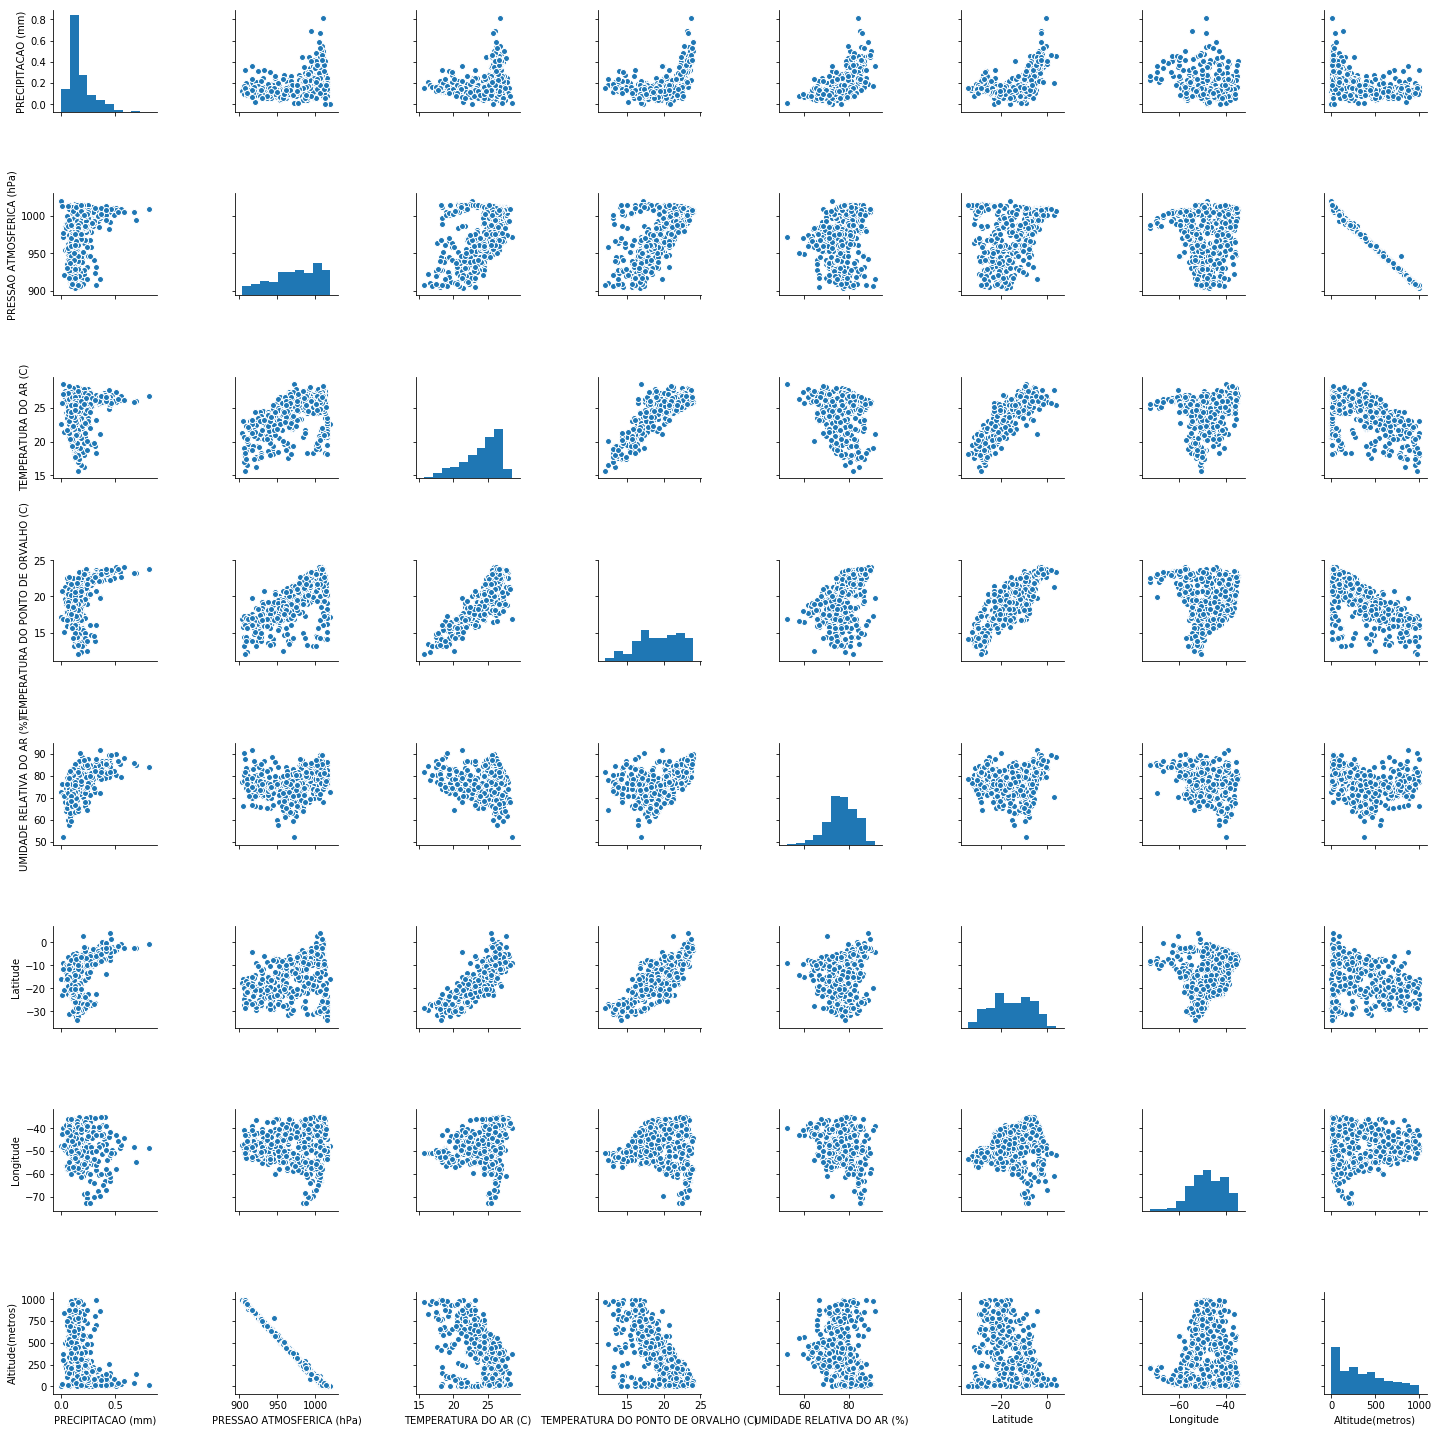

In [109]:
sns.pairplot(data_mean_abr[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [182]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_abr[features_UR_wanderlay], 
                                                    data_mean_abr[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.8527010947259219
MAE: 1.7217206873001034
MSE: 5.582088184092716
MSLE: 0.0009634211746700116
MedLE: 1.4043241793845311
R2 Score: 0.8514618659936961

Error(UR_true - UR_pred)

MIN: 0.043022228390341866 
MAX: 11.308107053045134 
MEAN: 1.7217206873001034
Std: 1.6179511917902771


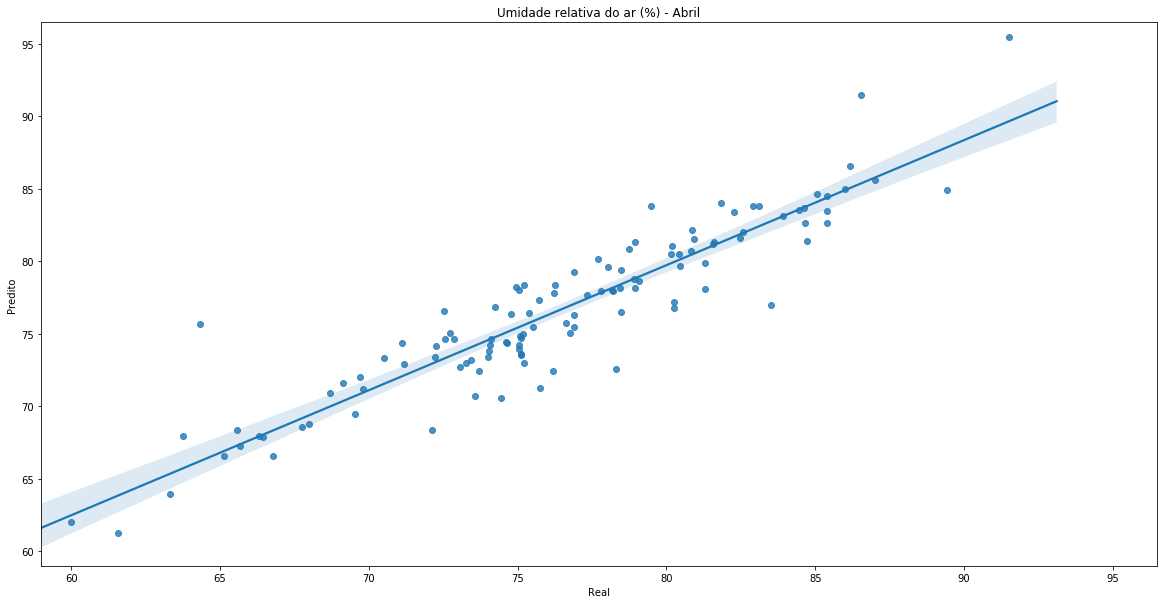

In [186]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Abril')
plt.savefig('../Validacao/graph/UR_abr.png')

In [187]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[4]=['Abril',len(data_mean_abr),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1    Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2  Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3      Março            458  1.547816  0.000084   6.132166  1.534825   
4      Abril            461  1.721721  0.043022  11.308107  1.617951   

   Variance  R2_score       MAE       MSE      MSLE     MedLE  
1  0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4  0.852701  0.851462  1.721721  5.582088  0.000963  1.404324

In [188]:
pickle.dump(mlp,open('../Models/UR/ur_4.model','wb'))

## Maio

In [189]:
data_mean_mai = pd.read_csv('../Dados/Brasil_5_mean.csv')

In [105]:
data_mean_mai.describe().T

count          mean          std  \
Altitude(metros)                            461.0    365.451193   282.146432   
Codigo OMM                                  461.0  85210.234273  2320.555153   
Day                                         461.0     16.063091     0.749579   
H(UTC)                                      461.0     11.564696     0.158921   
Latitude                                    461.0    -15.340775     8.258403   
Longitude                                   461.0    -48.004837     7.244575   
Month                                       461.0      5.000000     0.000000   
PRECIPITACAO (mm)                           461.0      0.123193     0.103104   
PRESSAO ATMOSFERICA (hPa)                   461.0    973.251006    30.782970   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            461.0    973.514332    30.799190   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            461.0    972.990365    30.768796   
TEMPERATURA DO AR (C)                       461.0     22.450030     3.834410   
TEMPERATURA DO PONTO DE ORVALHO (C)         461.0     17.508663     3.676890   
TEMPERATURA MAXIMA (C)                      461.0     23.066945     3.843669   
TEMPERATURA MINIMA (C)                      461.0     21.863477     3.827771   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  461.0     18.004193     3.669407   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  461.0     17.036709     3.690579   
UMIDADE RELATIVA DO AR (%)                  461.0     76.253248     7.440762   
UMIDADE RELATIVA DO MAXIMA AR (%)           461.0     78.892754     7.140832   
UMIDADE RELATIVA DO MINIMA AR (%)           461.0     73.526899     7.688150   
Year                                        461.0   2011.909165     1.286834   

                                                     min           25%  \
Altitude(metros)                                2.000000    112.000000   
Codigo OMM                                  81609.000000  81951.000000   
Day                                            14.866300     15.933319   
H(UTC)                                         10.250000     11.500000   
Latitude                                      -33.742297    -21.855567   
Longitude                                     -72.786778    -52.931912   
Month                                           5.000000      5.000000   
PRECIPITACAO (mm)                               0.000000      0.047625   
PRESSAO ATMOSFERICA (hPa)                     905.382490    951.965793   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              905.591783    952.204472   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              905.171366    951.738161   
TEMPERATURA DO AR (C)                          12.569929     19.747944   
TEMPERATURA DO PONTO DE ORVALHO (C)             9.638363     14.459362   
TEMPERATURA MAXIMA (C)                         13.169415     20.434008   
TEMPERATURA MINIMA (C)                         12.011766     19.172457   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     10.132744     14.972828   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      9.140936     13.979593   
UMIDADE RELATIVA DO AR (%)                     52.939649     71.199623   
UMIDADE RELATIVA DO MAXIMA AR (%)              55.579334     74.478720   
UMIDADE RELATIVA DO MINIMA AR (%)              50.456125     68.283956   
Year                                         2008.475984   2011.424007   

                                                     50%           75%  \
Altitude(metros)                              324.000000    552.000000   
Codigo OMM                                  86707.000000  86854.000000   
Day                                            16.000150     16.112511   
H(UTC)                                         11.514337     11.589424   
Latitude                                      -15.244620     -8.509552   
Longitude                                     -48.201231    -42.182817   
Month                                           5.000000      5.000000   
PRECIPITACAO (mm)                               0.098771      

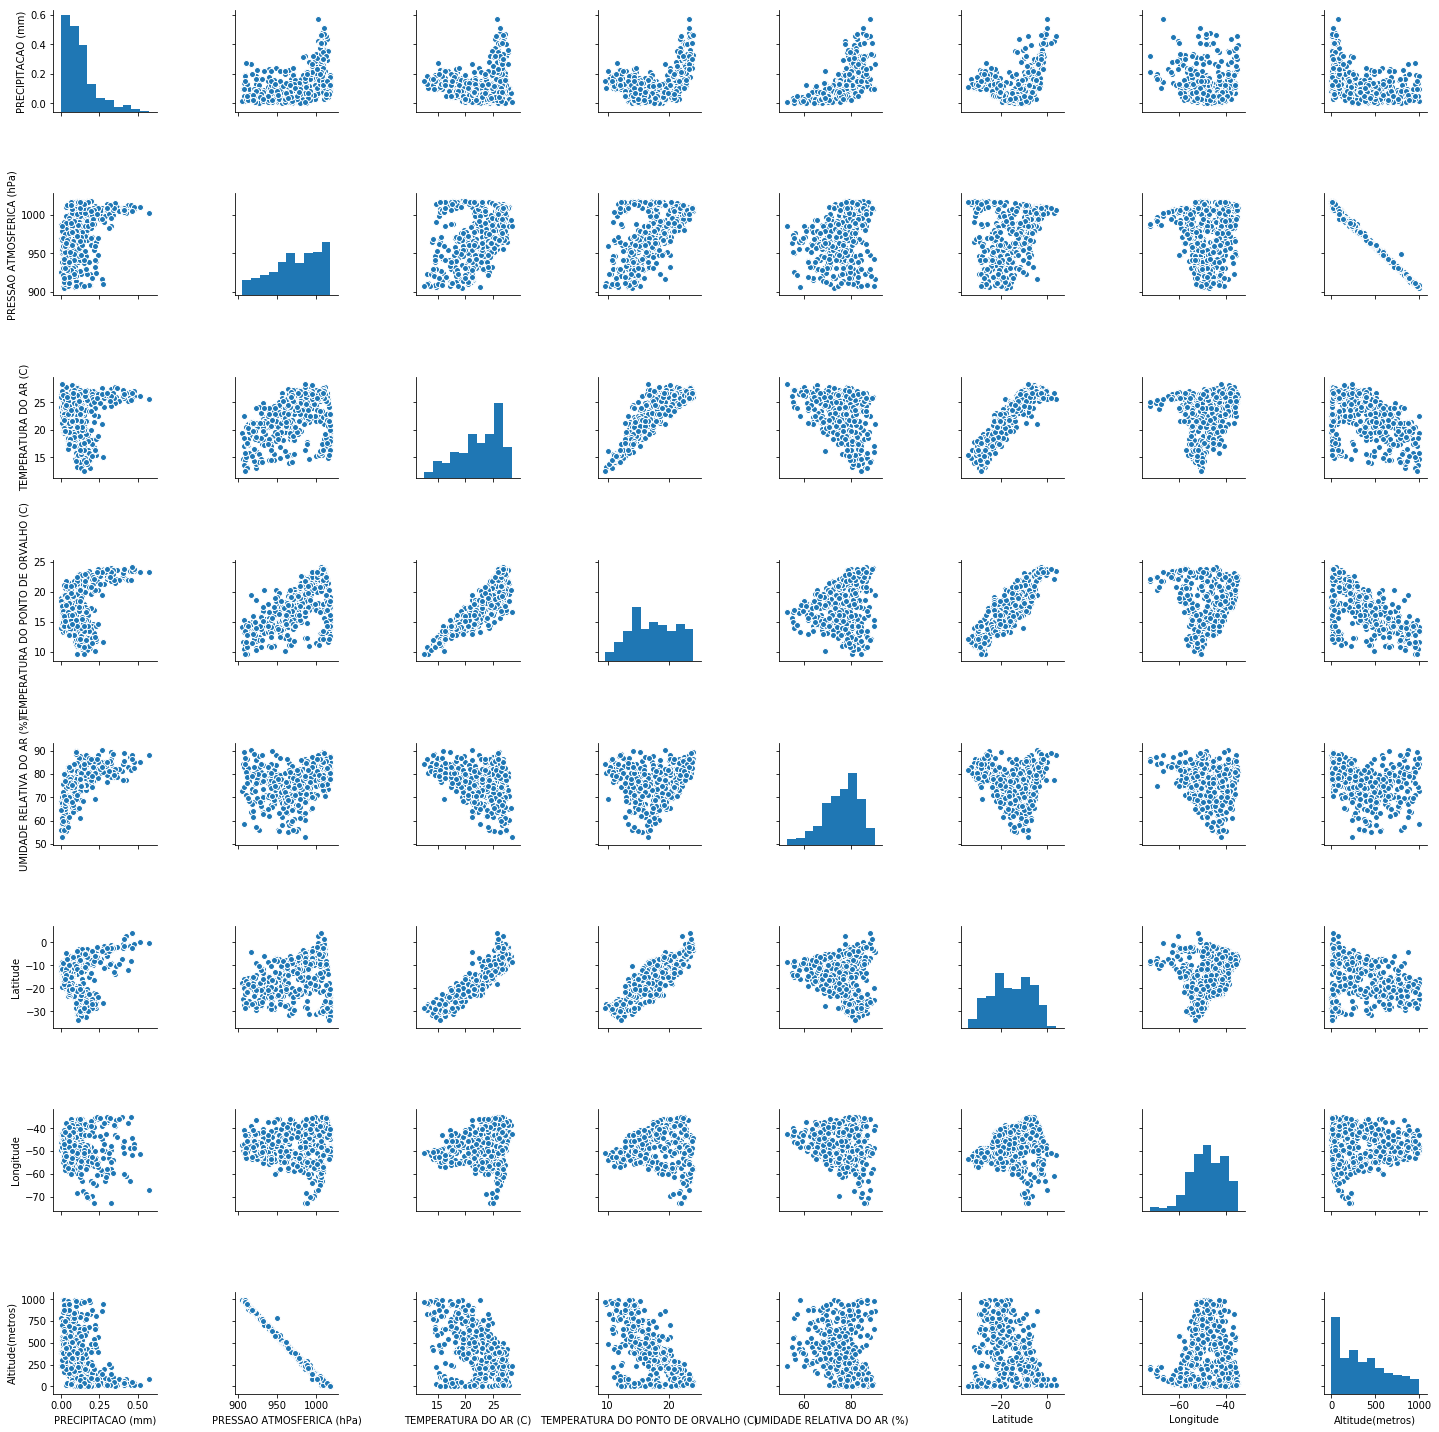

In [144]:
sns.pairplot(data_mean_mai[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mai[features_UR_wanderlay], 
                                                    data_mean_mai[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9231026759598258
MAE: 1.7260989436365228
MSE: 4.587775157217588
MSLE: 0.0008432445464797845
MedLE: 1.465991523869782
R2 Score: 0.9199932967446777

Error(UR_true - UR_pred)

MIN: 0.0009086624360747919 
MAX: 5.088714680634311 
MEAN: 1.7260989436365228
Std: 1.2682103902722401


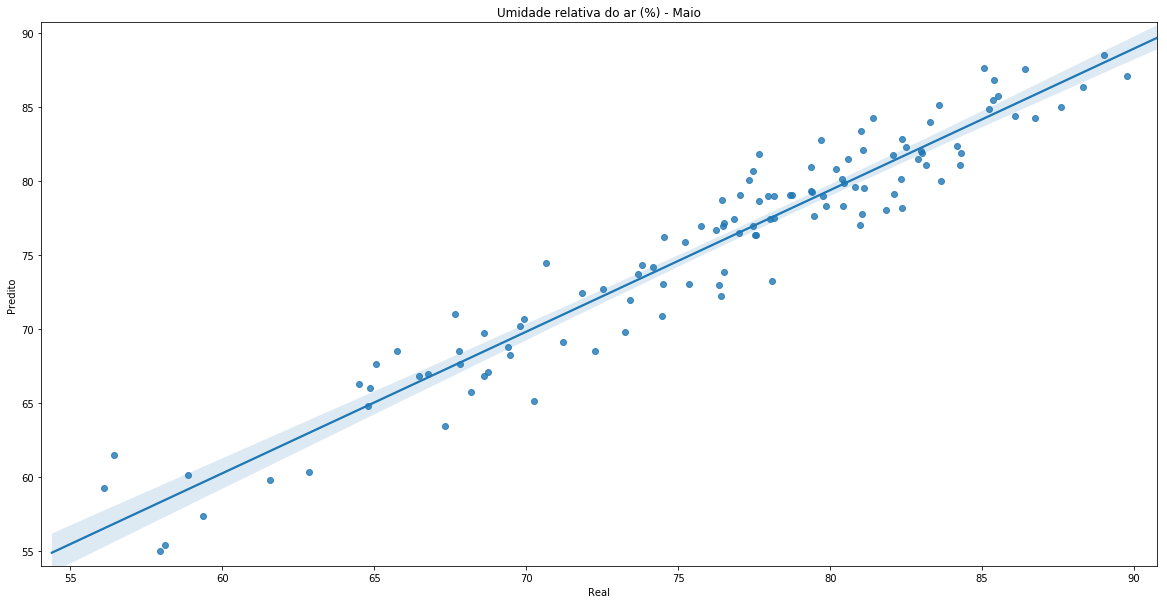

In [209]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Maio')
plt.savefig('../Validacao/graph/UR_mai.png')

In [210]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[5]=['Maio',len(data_mean_mai),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1    Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2  Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3      Março            458  1.547816  0.000084   6.132166  1.534825   
4      Abril            461  1.721721  0.043022  11.308107  1.617951   
5       Maio            461  1.726099  0.000909   5.088715  1.268210   

   Variance  R2_score       MAE       MSE      MSLE     MedLE  
1  0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4  0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5  0.923103  0.919993  1.726099  4.587775  0.000843  1.465992

In [211]:
pickle.dump(mlp,open('../Models/UR/ur_5.model','wb'))

## Junho

In [212]:
data_mean_jun = pd.read_csv('../Dados/Brasil_6_mean.csv')

In [122]:
data_mean_jun.describe().T

count          mean          std  \
Altitude(metros)                            467.0    367.693790   282.317818   
Codigo OMM                                  467.0  85230.062099  2312.154651   
Day                                         467.0     15.568692     0.741648   
H(UTC)                                      467.0     11.568056     0.130018   
Latitude                                    467.0    -15.366610     8.230777   
Longitude                                   467.0    -47.955419     7.218061   
Month                                       467.0      6.000000     0.000000   
PRECIPITACAO (mm)                           467.0      0.092087     0.090984   
PRESSAO ATMOSFERICA (hPa)                   467.0    974.401556    30.842412   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            467.0    974.654954    30.853832   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            467.0    974.151261    30.833433   
TEMPERATURA DO AR (C)                       467.0     21.482987     4.440954   
TEMPERATURA DO PONTO DE ORVALHO (C)         467.0     15.968079     3.966267   
TEMPERATURA MAXIMA (C)                      467.0     22.130199     4.477436   
TEMPERATURA MINIMA (C)                      467.0     20.861073     4.412019   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  467.0     16.468531     3.967428   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  467.0     15.487018     3.973838   
UMIDADE RELATIVA DO AR (%)                  467.0     74.058412     9.237306   
UMIDADE RELATIVA DO MAXIMA AR (%)           467.0     76.736389     8.935864   
UMIDADE RELATIVA DO MINIMA AR (%)           467.0     71.318639     9.486202   
Year                                        467.0   2011.914577     1.376556   

                                                     min           25%  \
Altitude(metros)                                2.000000    112.000000   
Codigo OMM                                  81609.000000  81952.500000   
Day                                            13.869565     15.427756   
H(UTC)                                         11.231362     11.496405   
Latitude                                      -33.742297    -21.818064   
Longitude                                     -72.786778    -52.882993   
Month                                           6.000000      6.000000   
PRECIPITACAO (mm)                               0.000000      0.020936   
PRESSAO ATMOSFERICA (hPa)                     906.991212    953.436232   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              907.195698    953.680282   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              906.784466    953.176252   
TEMPERATURA DO AR (C)                           9.339231     18.562987   
TEMPERATURA DO PONTO DE ORVALHO (C)             6.266615     12.948326   
TEMPERATURA MAXIMA (C)                         10.022923     19.186487   
TEMPERATURA MINIMA (C)                          8.686923     17.942731   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)      6.847385     13.469907   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      5.659538     12.470172   
UMIDADE RELATIVA DO AR (%)                     46.450065     67.698712   
UMIDADE RELATIVA DO MAXIMA AR (%)              49.169909     70.838276   
UMIDADE RELATIVA DO MINIMA AR (%)              43.901859     64.347844   
Year                                         2008.334310   2011.422952   

                                                     50%           75%  \
Altitude(metros)                              327.000000    562.000000   
Codigo OMM                                  86709.000000  86853.500000   
Day                                            15.501777     15.626502   
H(UTC)                                         11.517130     11.595407   
Latitude                                      -15.280215     -8.632726   
Longitude                                     -48.177259    -42.216593   
Month                                           6.000000      6.000000   
PRECIPITACAO (mm)                               0.060299      

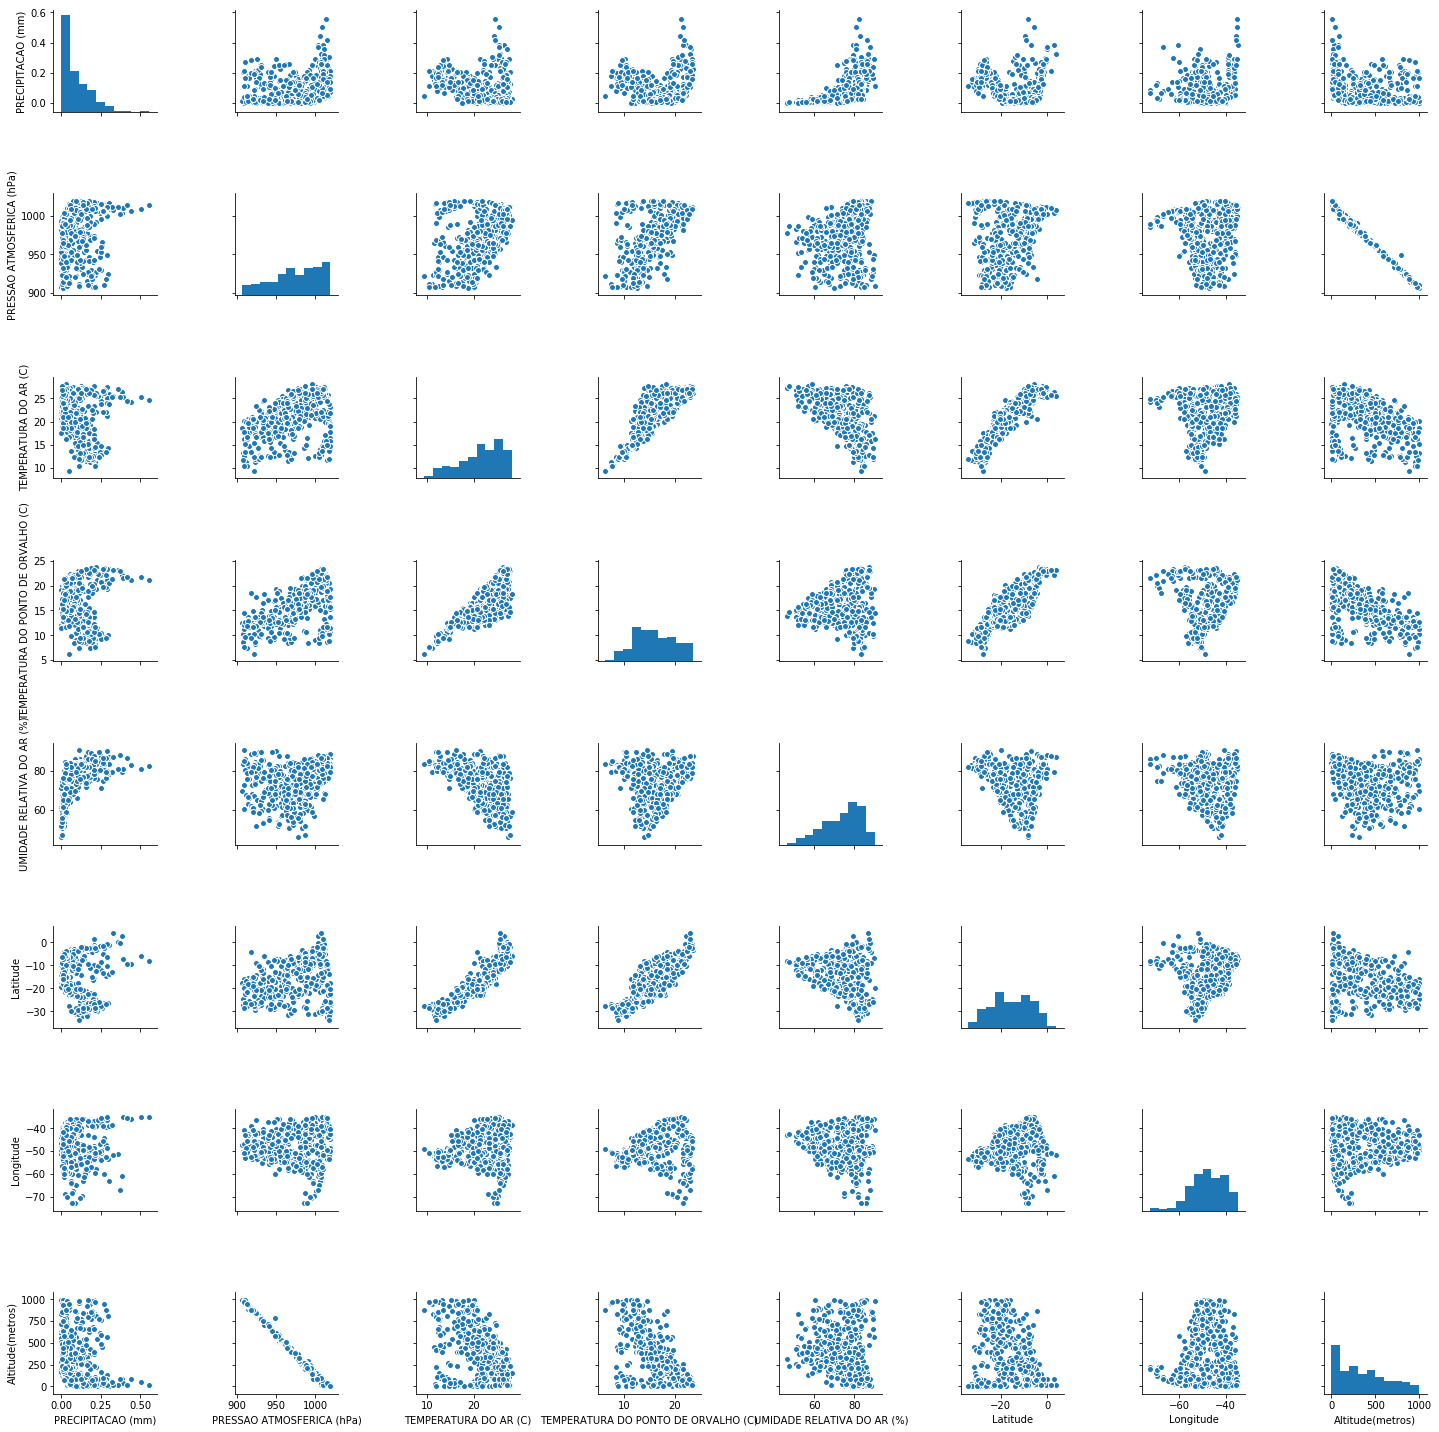

In [164]:
sns.pairplot(data_mean_jun[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [216]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jun[features_UR_wanderlay], 
                                                    data_mean_jun[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9484966347854229
MAE: 1.7627218836113299
MSE: 5.169820261087255
MSLE: 0.000991215786652419
MedLE: 1.538057086279622
R2 Score: 0.9474134542523596

Error(UR_true - UR_pred)

MIN: 0.005796292125381797 
MAX: 8.22272550533907 
MEAN: 1.7627218836113299
Std: 1.4361865554742452


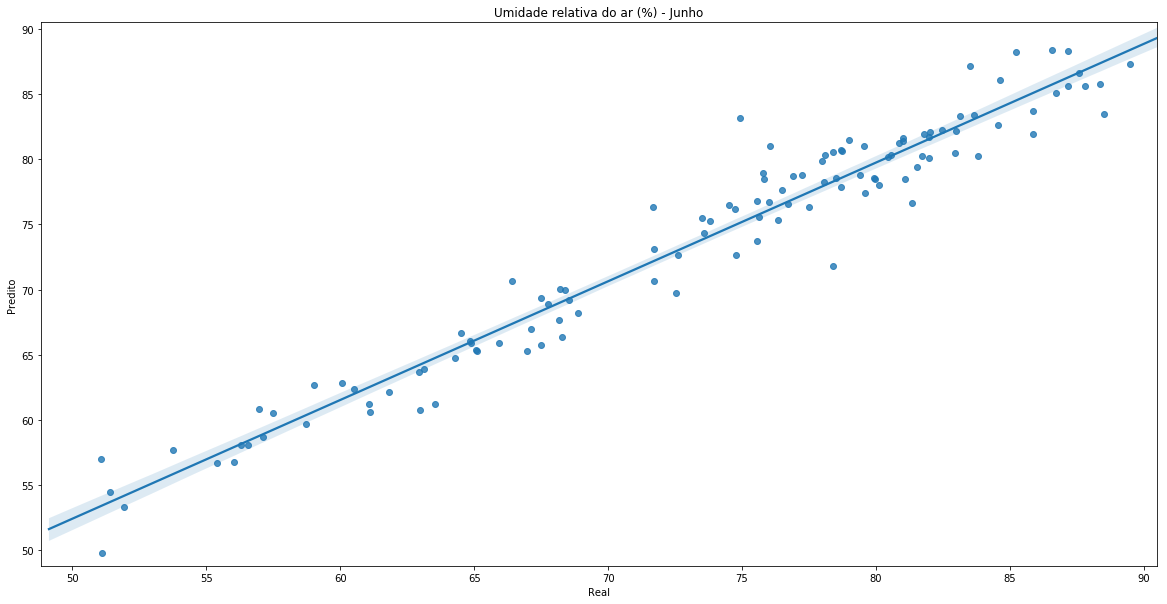

In [217]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Junho')
plt.savefig('../Validacao/graph/UR_jun.png')

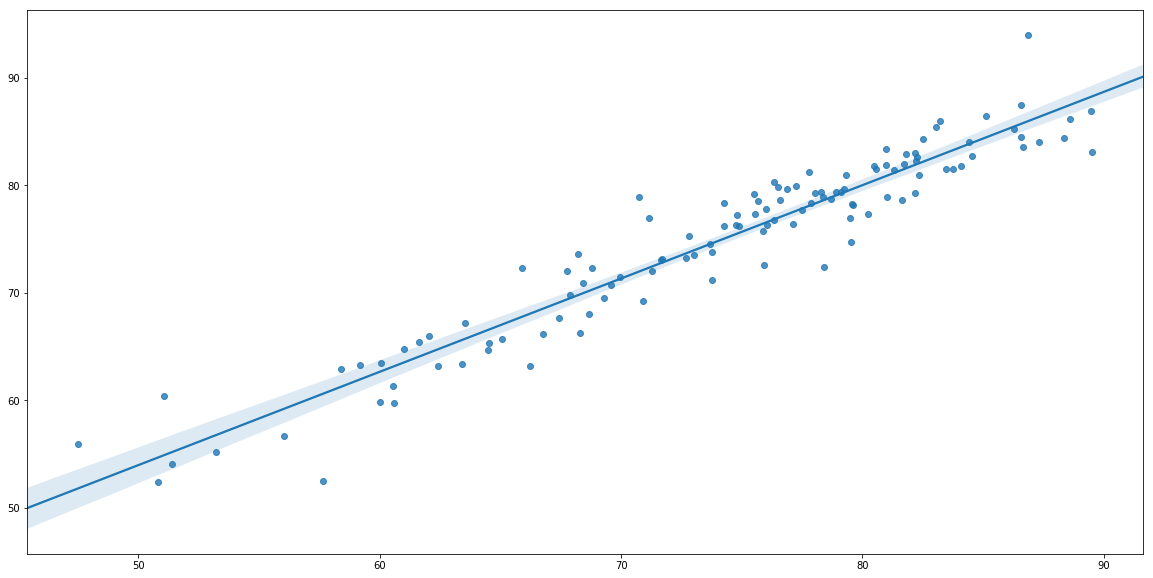

In [144]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [218]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[6]=['Junho',len(data_mean_jun),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1    Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2  Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3      Março            458  1.547816  0.000084   6.132166  1.534825   
4      Abril            461  1.721721  0.043022  11.308107  1.617951   
5       Maio            461  1.726099  0.000909   5.088715  1.268210   
6      Junho            467  1.762722  0.005796   8.222726  1.436187   

   Variance  R2_score       MAE       MSE      MSLE     MedLE  
1  0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4  0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5  0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6  0.948497  0.947413  1.762722  5.169820  0.000991  1.538057

In [219]:
pickle.dump(mlp,open('../Models/UR/ur_6.model','wb'))

## Julho

In [220]:
data_mean_jul = pd.read_csv('../Dados/Brasil_7_mean.csv')

In [148]:
data_mean_jul.describe().T

count          mean          std  \
Altitude(metros)                            467.0    366.839745   282.822694   
Codigo OMM                                  467.0  85230.299786  2312.301895   
Day                                         467.0     16.028319     0.561838   
H(UTC)                                      467.0     11.559463     0.226912   
Latitude                                    467.0    -15.379002     8.227039   
Longitude                                   467.0    -47.967093     7.213583   
Month                                       467.0      7.000000     0.000000   
PRECIPITACAO (mm)                           467.0      0.076520     0.083894   
PRESSAO ATMOSFERICA (hPa)                   467.0    974.856763    30.987094   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            467.0    974.845937    31.182594   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            467.0    974.331546    31.164814   
TEMPERATURA DO AR (C)                       467.0     21.428758     4.361472   
TEMPERATURA DO PONTO DE ORVALHO (C)         467.0     14.622087     4.063412   
TEMPERATURA MAXIMA (C)                      467.0     22.125319     4.411764   
TEMPERATURA MINIMA (C)                      467.0     20.754905     4.319171   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  467.0     15.149514     4.055931   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  467.0     14.113819     4.076802   
UMIDADE RELATIVA DO AR (%)                  467.0     69.517156    11.790551   
UMIDADE RELATIVA DO MAXIMA AR (%)           467.0     72.259530    11.501585   
UMIDADE RELATIVA DO MINIMA AR (%)           467.0     66.610505    12.026824   
Year                                        467.0   2011.852785     1.395611   

                                                     min           25%  \
Altitude(metros)                                1.161000    111.000000   
Codigo OMM                                  81609.000000  81952.500000   
Day                                             5.750000     15.951357   
H(UTC)                                          7.500000     11.500000   
Latitude                                      -33.742297    -21.818064   
Longitude                                     -72.786778    -52.882993   
Month                                           7.000000      7.000000   
PRECIPITACAO (mm)                               0.000000      0.011619   
PRESSAO ATMOSFERICA (hPa)                     907.332957    953.696769   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              890.525000    953.792560   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              889.950000    953.302803   
TEMPERATURA DO AR (C)                          10.860840     18.867691   
TEMPERATURA DO PONTO DE ORVALHO (C)             7.618140     11.322636   
TEMPERATURA MAXIMA (C)                         11.447157     19.453876   
TEMPERATURA MINIMA (C)                         10.307892     18.103322   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)      8.121935     11.902262   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      7.136024     10.792832   
UMIDADE RELATIVA DO AR (%)                     42.830816     59.970842   
UMIDADE RELATIVA DO MAXIMA AR (%)              45.489462     63.345097   
UMIDADE RELATIVA DO MINIMA AR (%)              39.470292     56.564193   
Year                                         2003.500000   2011.321008   

                                                     50%           75%  \
Altitude(metros)                              324.000000    562.000000   
Codigo OMM                                  86710.000000  86853.500000   
Day                                            16.000000     16.134801   
H(UTC)                                         11.523430     11.594776   
Latitude                                      -15.300159     -8.632726   
Longitude                                     -48.177259    -42.216593   
Month                                           7.000000      7.000000   
PRECIPITACAO (mm)                               0.041308      

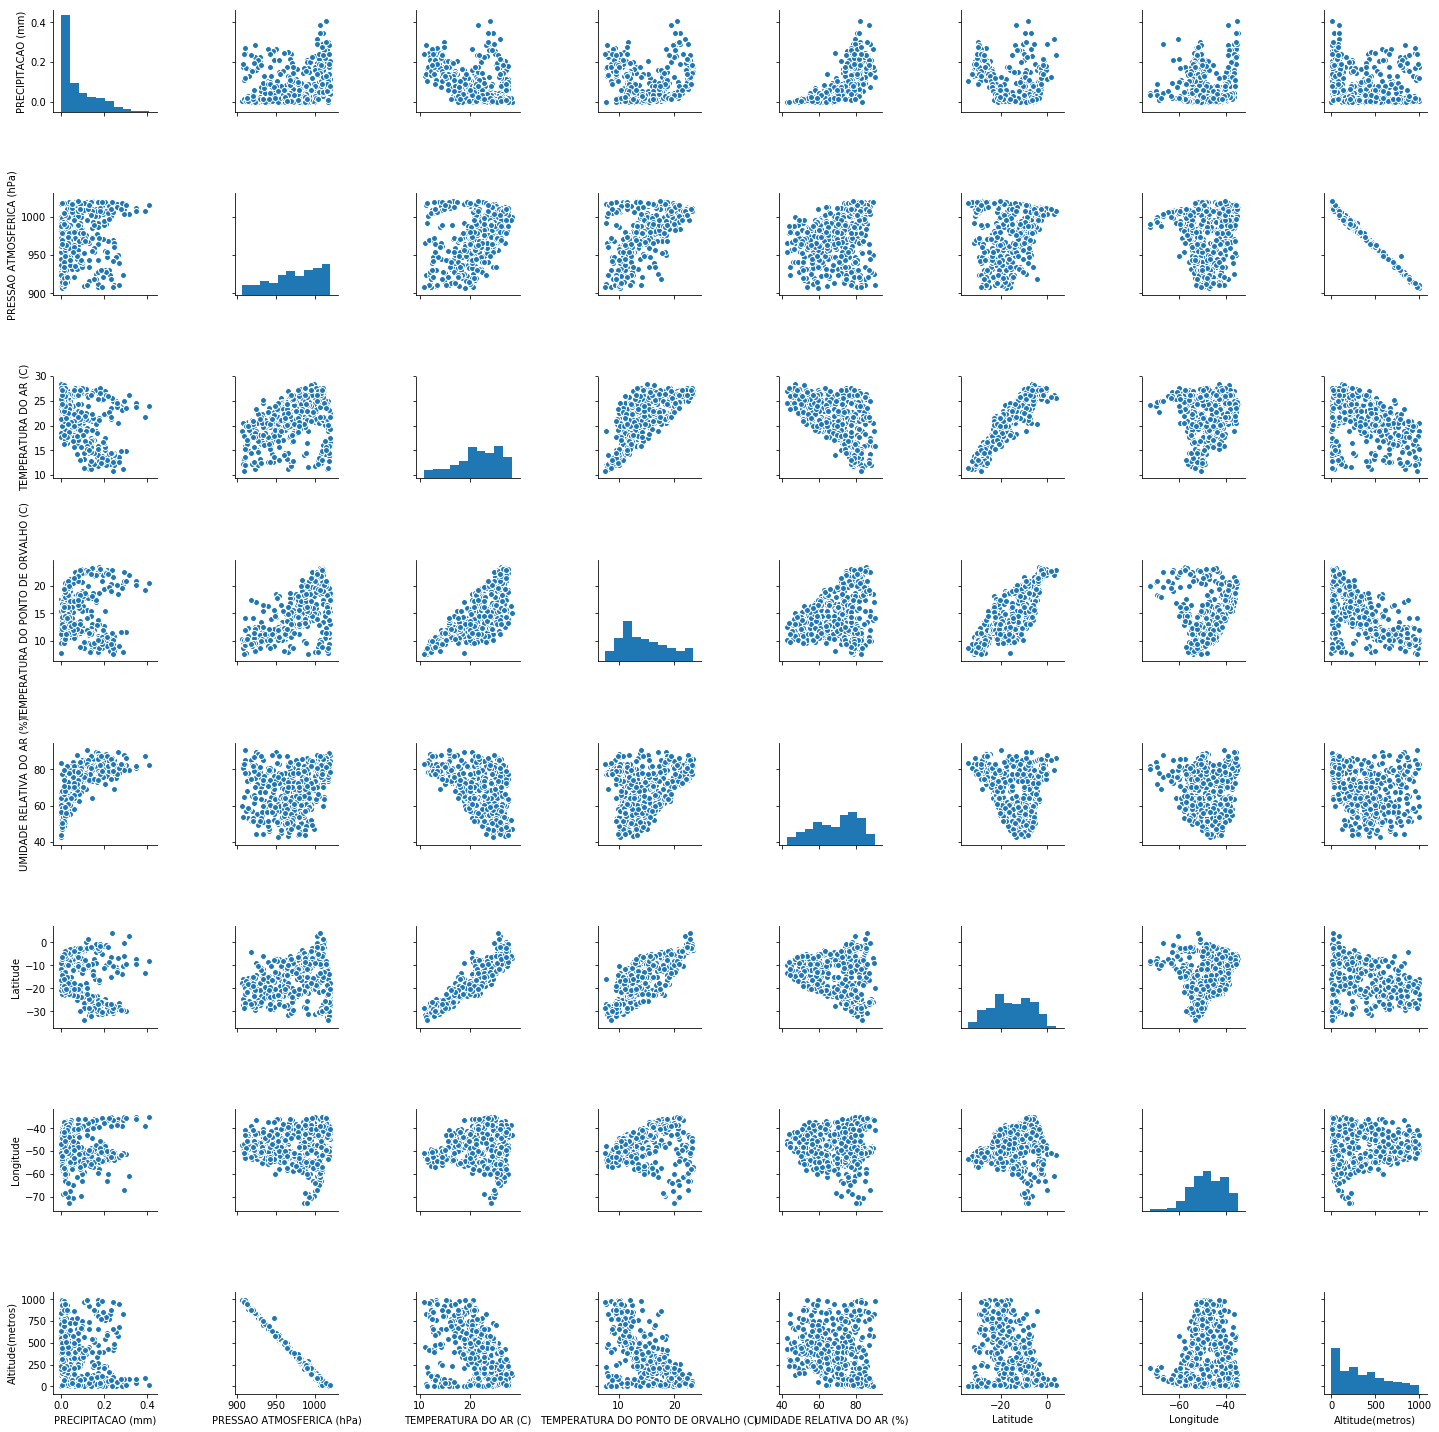

In [175]:
sns.pairplot(data_mean_jul[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [238]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jul[features_UR_wanderlay], 
                                                    data_mean_jul[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9524322291213131
MAE: 1.9010735670789711
MSE: 6.231194141110883
MSLE: 0.0014549519992423396
MedLE: 1.6022431598684577
R2 Score: 0.9522663871080554

Error(UR_true - UR_pred)

MIN: 0.020216870284372135 
MAX: 8.889673726870413 
MEAN: 1.9010735670789711
Std: 1.6177494965737185


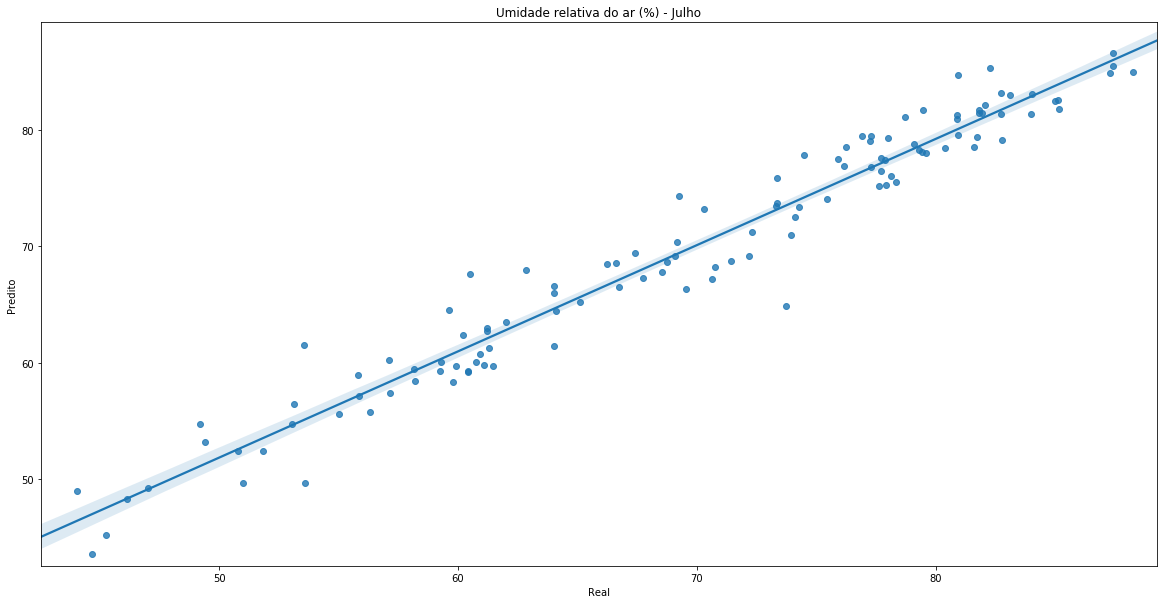

In [239]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Julho')
plt.savefig('../Validacao/graph/UR_jul.png')

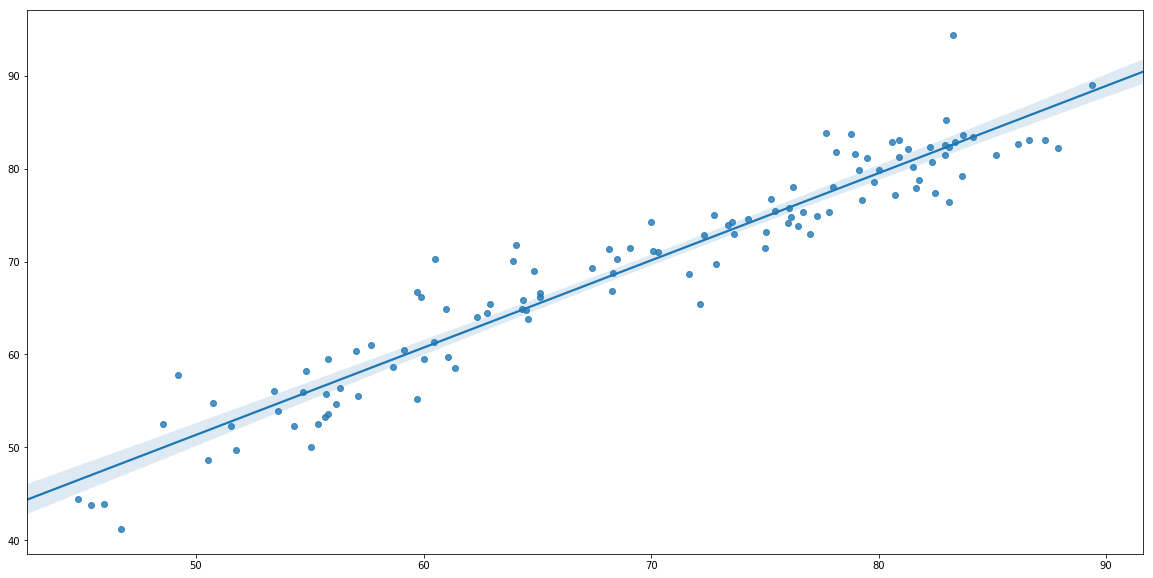

In [151]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [240]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[7]=['Julho',len(data_mean_jul),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1    Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2  Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3      Março            458  1.547816  0.000084   6.132166  1.534825   
4      Abril            461  1.721721  0.043022  11.308107  1.617951   
5       Maio            461  1.726099  0.000909   5.088715  1.268210   
6      Junho            467  1.762722  0.005796   8.222726  1.436187   
7      Julho            467  1.901074  0.020217   8.889674  1.617749   

   Variance  R2_score       MAE       MSE      MSLE     MedLE  
1  0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4  0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5  0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6  0.948497  0.947413  1.762722  5.169820  0.000991  1.538057  
7  0.952432  0.952266  1.901074  6.231194  0.001455  1.602243

In [241]:
pickle.dump(mlp,open('../Models/UR/ur_7.model','wb'))

## Agosto

In [242]:
data_mean_ago = pd.read_csv('../Dados/Brasil_8_mean.csv')

In [155]:
data_mean_ago.describe().T

count          mean          std  \
Altitude(metros)                            468.0    367.119658   282.163663   
Codigo OMM                                  468.0  85223.752137  2315.358203   
Day                                         468.0     16.071623     0.416195   
H(UTC)                                      468.0     11.552209     0.126788   
Latitude                                    468.0    -15.393529     8.258124   
Longitude                                   468.0    -47.985259     7.214612   
Month                                       468.0      8.000000     0.000000   
PRECIPITACAO (mm)                           468.0      0.056369     0.063121   
PRESSAO ATMOSFERICA (hPa)                   468.0    974.167542    30.927305   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            468.0    974.442797    30.936778   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            468.0    973.897267    30.918956   
TEMPERATURA DO AR (C)                       468.0     22.546904     4.120797   
TEMPERATURA DO PONTO DE ORVALHO (C)         468.0     13.964936     4.084767   
TEMPERATURA MAXIMA (C)                      468.0     23.293924     4.182997   
TEMPERATURA MINIMA (C)                      468.0     21.823562     4.066033   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  468.0     14.529813     4.058047   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  468.0     13.418350     4.114575   
UMIDADE RELATIVA DO AR (%)                  468.0     63.627430    13.919670   
UMIDADE RELATIVA DO MAXIMA AR (%)           468.0     66.542968    13.716423   
UMIDADE RELATIVA DO MINIMA AR (%)           468.0     60.716578    14.040964   
Year                                        468.0   2011.845039     1.365033   

                                                     min           25%  \
Altitude(metros)                                2.000000    112.000000   
Codigo OMM                                  81609.000000  81951.750000   
Day                                            12.961975     15.967339   
H(UTC)                                         10.939145     11.494913   
Latitude                                      -33.742297    -21.886764   
Longitude                                     -72.786778    -52.900595   
Month                                           8.000000      8.000000   
PRECIPITACAO (mm)                               0.000000      0.007552   
PRESSAO ATMOSFERICA (hPa)                     906.768525    952.962715   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              906.999313    953.227630   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              906.522570    952.707843   
TEMPERATURA DO AR (C)                          12.610912     20.162672   
TEMPERATURA DO PONTO DE ORVALHO (C)             7.737772     10.593846   
TEMPERATURA MAXIMA (C)                         13.167815     20.932203   
TEMPERATURA MINIMA (C)                         12.019615     19.306606   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)      8.332838     11.176662   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      7.194590     10.010868   
UMIDADE RELATIVA DO AR (%)                     34.846968     51.219364   
UMIDADE RELATIVA DO MAXIMA AR (%)              37.862505     55.022961   
UMIDADE RELATIVA DO MINIMA AR (%)              32.178056     47.956545   
Year                                         2008.497960   2011.277721   

                                                     50%           75%  \
Altitude(metros)                              325.500000    560.500000   
Codigo OMM                                  86709.500000  86854.250000   
Day                                            16.010348     16.131188   
H(UTC)                                         11.507641     11.574038   
Latitude                                      -15.290187     -8.576477   
Longitude                                     -48.193060    -42.233481   
Month                                           8.000000      8.000000   
PRECIPITACAO (mm)                               0.030055      

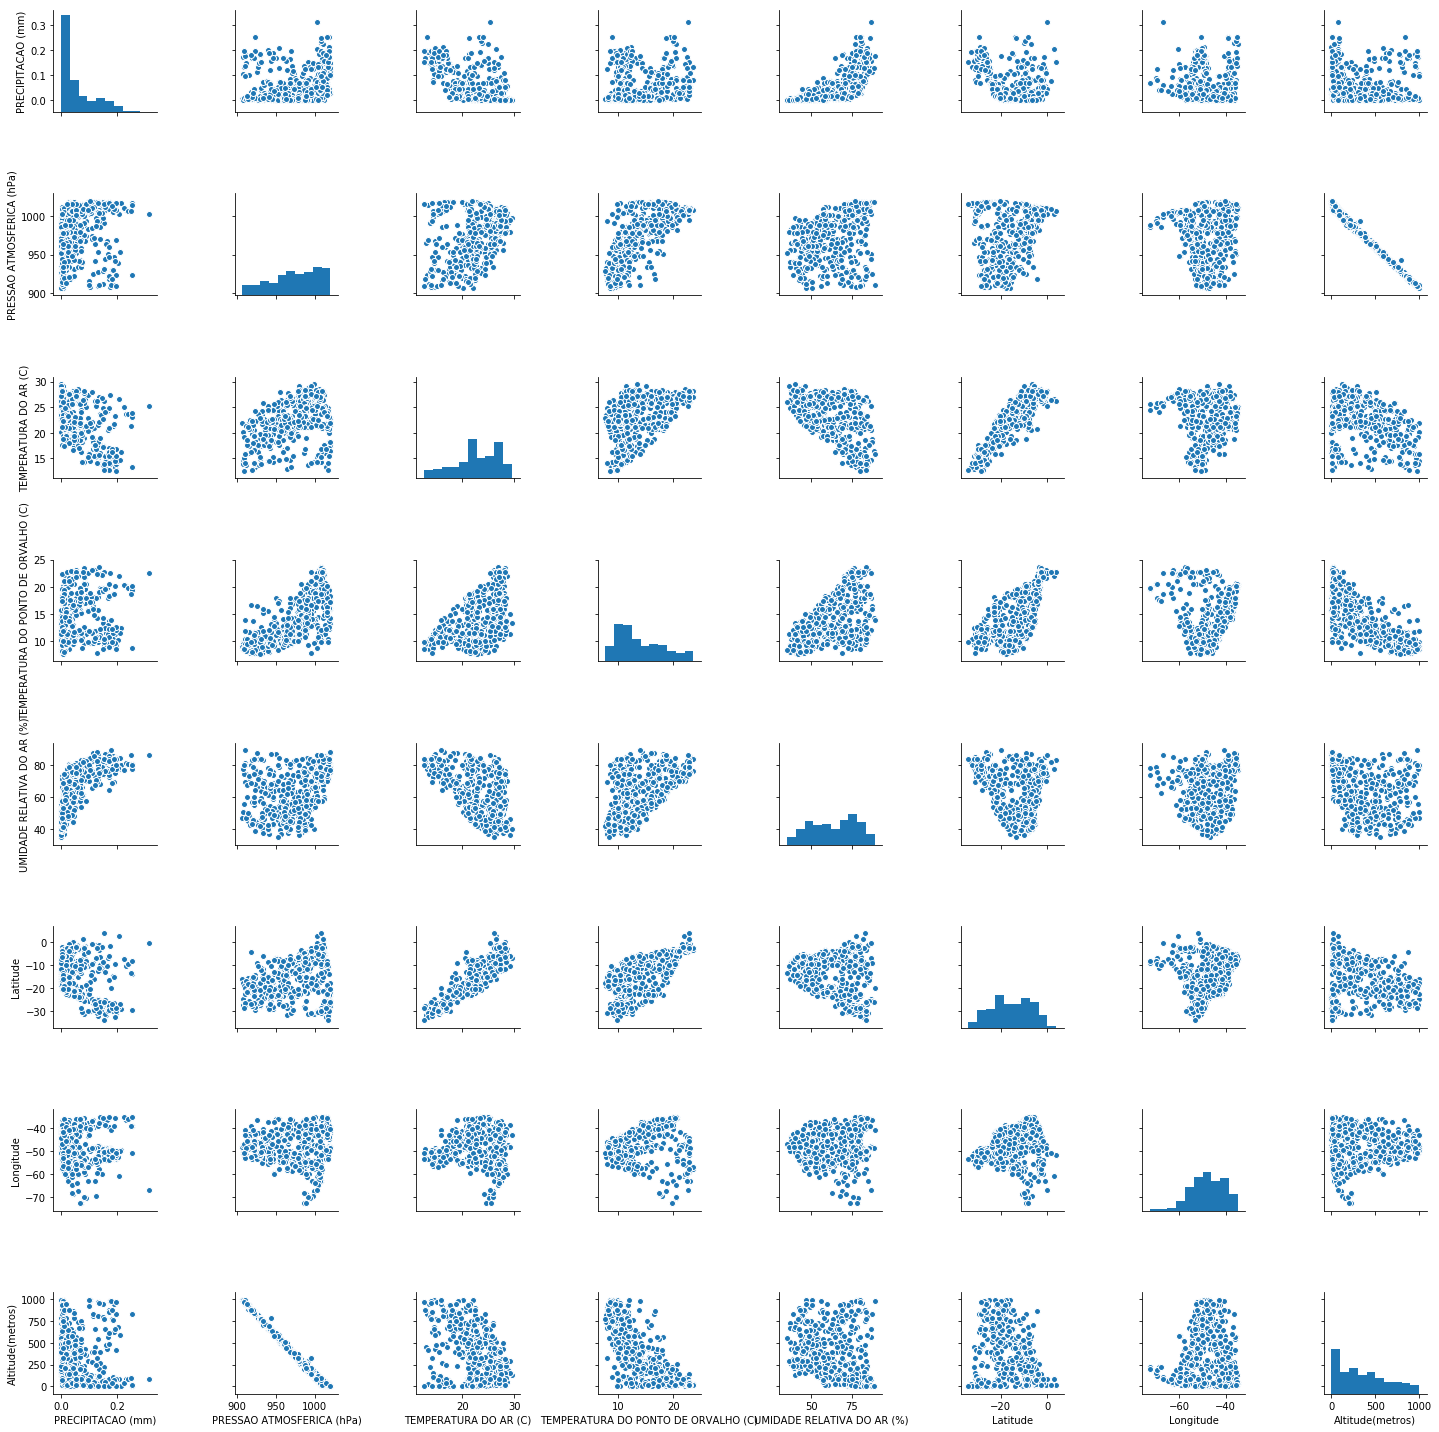

In [187]:
sns.pairplot(data_mean_ago[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [247]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_ago[features_UR_wanderlay], 
                                                    data_mean_ago[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9631293186816728
MAE: 1.9616293462199015
MSE: 6.928095655314802
MSLE: 0.001823979353875091
MedLE: 1.588527183840796
R2 Score: 0.963085486538113

Error(UR_true - UR_pred)

MIN: 0.010002291865134794 
MAX: 8.40942161685497 
MEAN: 1.9616293462199015
Std: 1.755023066333797


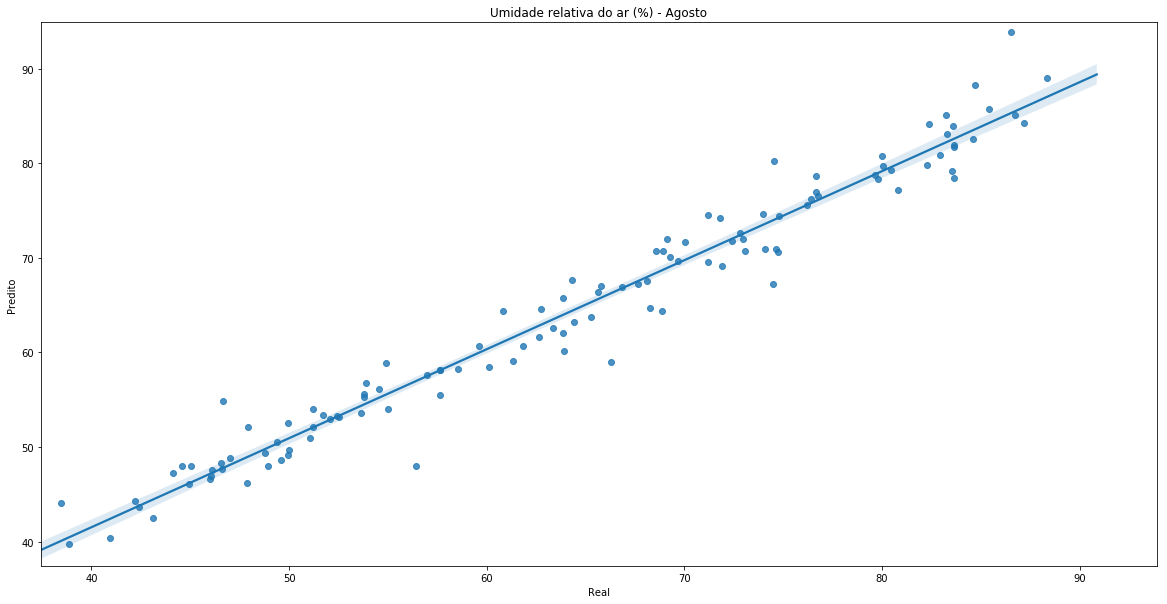

In [249]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Agosto')
plt.savefig('../Validacao/graph/UR_ago.png')

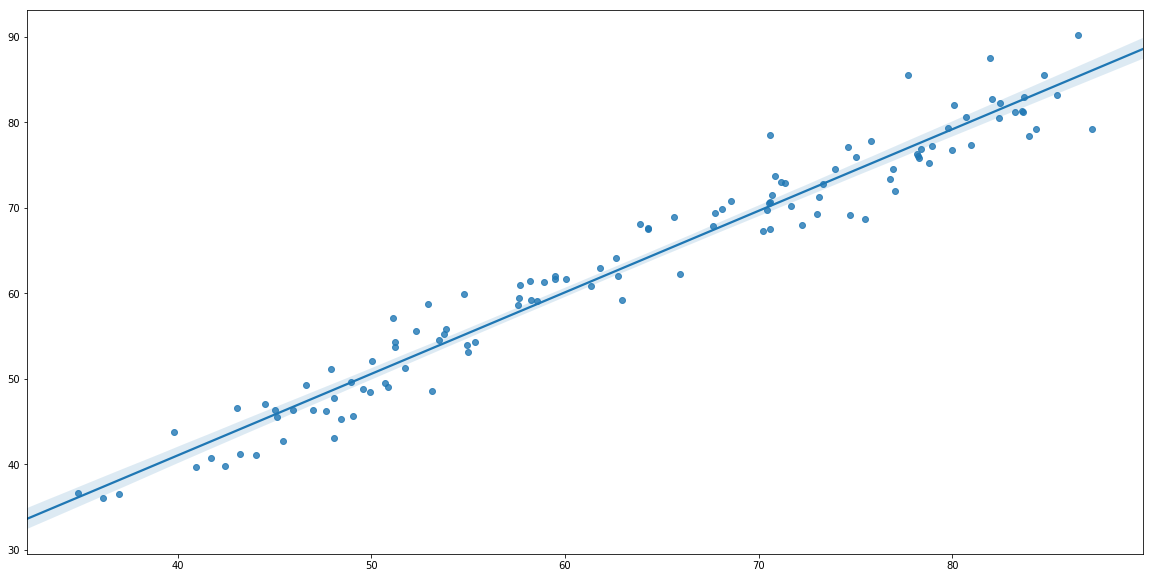

In [163]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [250]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[8]=['Agosto',len(data_mean_ago),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1    Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2  Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3      Março            458  1.547816  0.000084   6.132166  1.534825   
4      Abril            461  1.721721  0.043022  11.308107  1.617951   
5       Maio            461  1.726099  0.000909   5.088715  1.268210   
6      Junho            467  1.762722  0.005796   8.222726  1.436187   
7      Julho            467  1.901074  0.020217   8.889674  1.617749   
8     Agosto            468  1.961629  0.010002   8.409422  1.755023   

   Variance  R2_score       MAE       MSE      MSLE     MedLE  
1  0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4  0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5  0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6  0.948497  0.947413  1.762722  5.169820  0.000991  1.538057  
7  0.952432  0.952266  1.901074  6.231194  0.001455  1.602243  
8  0.963129  0.963085  1.961629  6.928096  0.001824  1.588527

In [251]:
pickle.dump(mlp,open('../Models/UR/ur_8.model','wb'))

## Setembro

In [252]:
data_mean_set = pd.read_csv('../Dados/Brasil_9_mean.csv')

In [167]:
data_mean_set.describe().T

count          mean          std  \
Altitude(metros)                            470.0    366.929787   281.621882   
Codigo OMM                                  470.0  85219.608511  2316.393599   
Day                                         470.0     15.587736     0.502135   
H(UTC)                                      470.0     11.546775     0.118220   
Latitude                                    470.0    -15.364434     8.253072   
Longitude                                   470.0    -47.977661     7.204263   
Month                                       470.0      9.000000     0.000000   
PRECIPITACAO (mm)                           470.0      0.082031     0.073555   
PRESSAO ATMOSFERICA (hPa)                   470.0    973.048147    31.054667   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            470.0    973.353452    31.063006   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            470.0    972.750693    31.046464   
TEMPERATURA DO AR (C)                       470.0     23.881778     4.086183   
TEMPERATURA DO PONTO DE ORVALHO (C)         470.0     15.126040     3.715802   
TEMPERATURA MAXIMA (C)                      470.0     24.603122     4.155611   
TEMPERATURA MINIMA (C)                      470.0     23.189165     4.020234   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  470.0     15.689616     3.685038   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  470.0     14.580829     3.749191   
UMIDADE RELATIVA DO AR (%)                  470.0     63.388221    13.324273   
UMIDADE RELATIVA DO MAXIMA AR (%)           470.0     66.243611    13.210058   
UMIDADE RELATIVA DO MINIMA AR (%)           470.0     60.525174    13.366882   
Year                                        470.0   2011.825930     1.368305   

                                                     min           25%  \
Altitude(metros)                                2.000000    112.250000   
Codigo OMM                                  81609.000000  81951.250000   
Day                                            12.930233     15.472327   
H(UTC)                                         10.413861     11.498987   
Latitude                                      -33.742297    -21.836815   
Longitude                                     -72.786778    -52.886575   
Month                                           9.000000      9.000000   
PRECIPITACAO (mm)                               0.000000      0.025846   
PRESSAO ATMOSFERICA (hPa)                     905.037045    951.463353   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              905.304832    951.784577   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              904.774020    951.178688   
TEMPERATURA DO AR (C)                          13.161360     21.735946   
TEMPERATURA DO PONTO DE ORVALHO (C)             8.071139     12.147362   
TEMPERATURA MAXIMA (C)                         13.738929     22.439340   
TEMPERATURA MINIMA (C)                         12.605210     21.000117   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)      8.719033     12.797977   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      7.424337     11.556987   
UMIDADE RELATIVA DO AR (%)                     32.935940     52.619026   
UMIDADE RELATIVA DO MAXIMA AR (%)              35.571516     55.753562   
UMIDADE RELATIVA DO MINIMA AR (%)              30.504717     49.338149   
Year                                         2008.379341   2011.278668   

                                                     50%           75%  \
Altitude(metros)                              325.500000    557.250000   
Codigo OMM                                  86708.000000  86853.750000   
Day                                            15.501545     15.629294   
H(UTC)                                         11.510020     11.583166   
Latitude                                      -15.262417     -8.531860   
Longitude                                     -48.193060    -42.252647   
Month                                           9.000000      9.000000   
PRECIPITACAO (mm)                               0.061013      

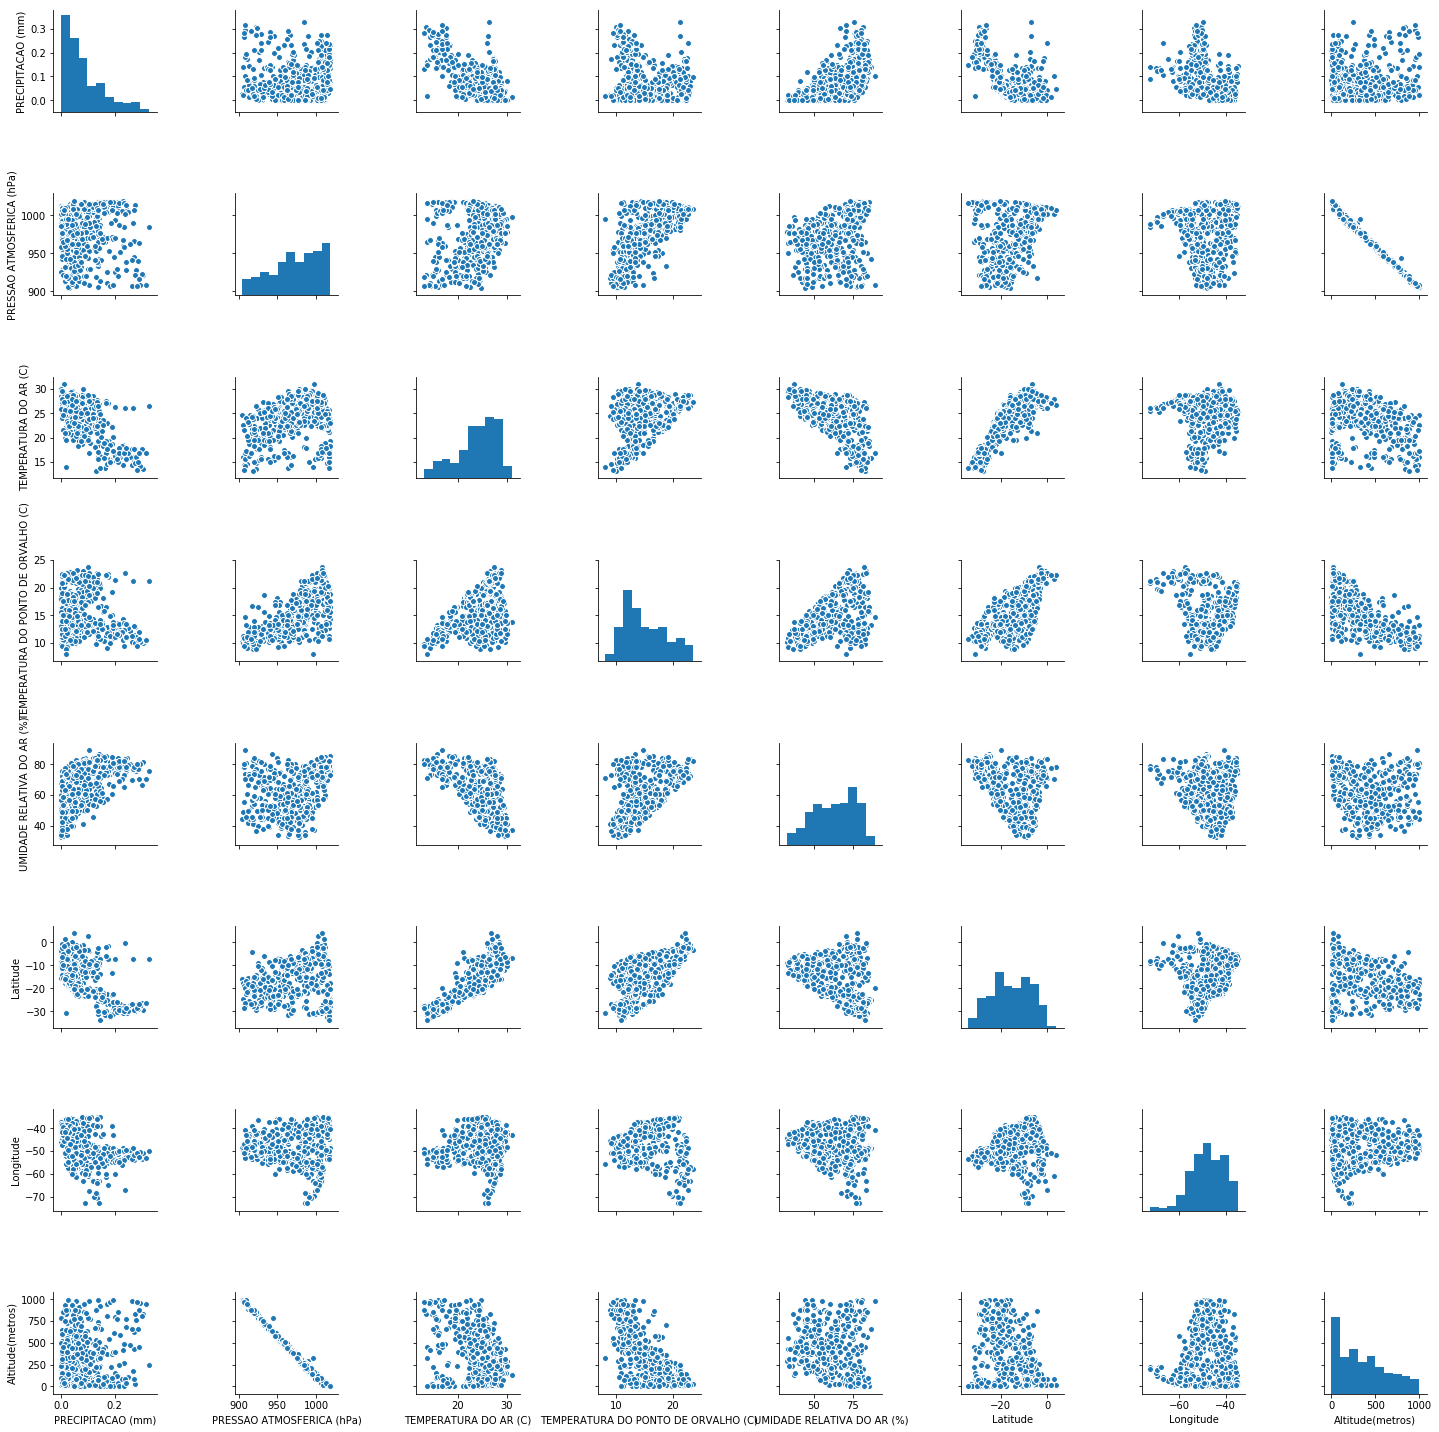

In [195]:
sns.pairplot(data_mean_set[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [259]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_set[features_UR_wanderlay], 
                                                    data_mean_set[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9671004423189373
MAE: 1.8759149104042272
MSE: 6.308734500954254
MSLE: 0.0019675665541617907
MedLE: 1.3787612910008313
R2 Score: 0.9668600612860903

Error(UR_true - UR_pred)

MIN: 0.0545136936557995 
MAX: 8.397614010984768 
MEAN: 1.8759149104042272
Std: 1.670232843012421


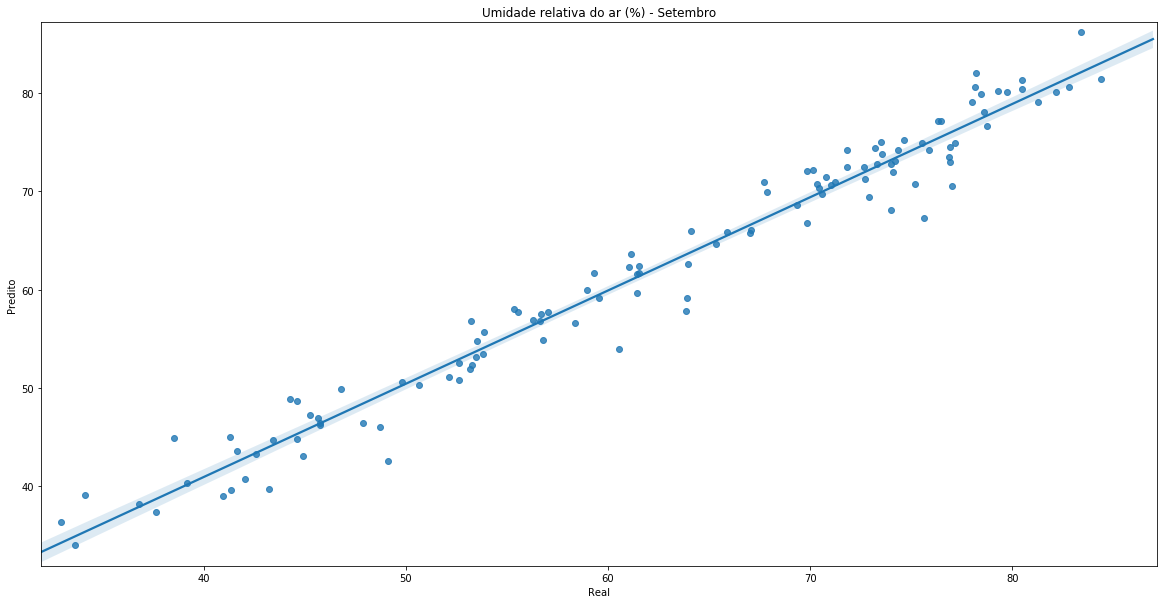

In [260]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Setembro')
plt.savefig('../Validacao/graph/UR_set.png')

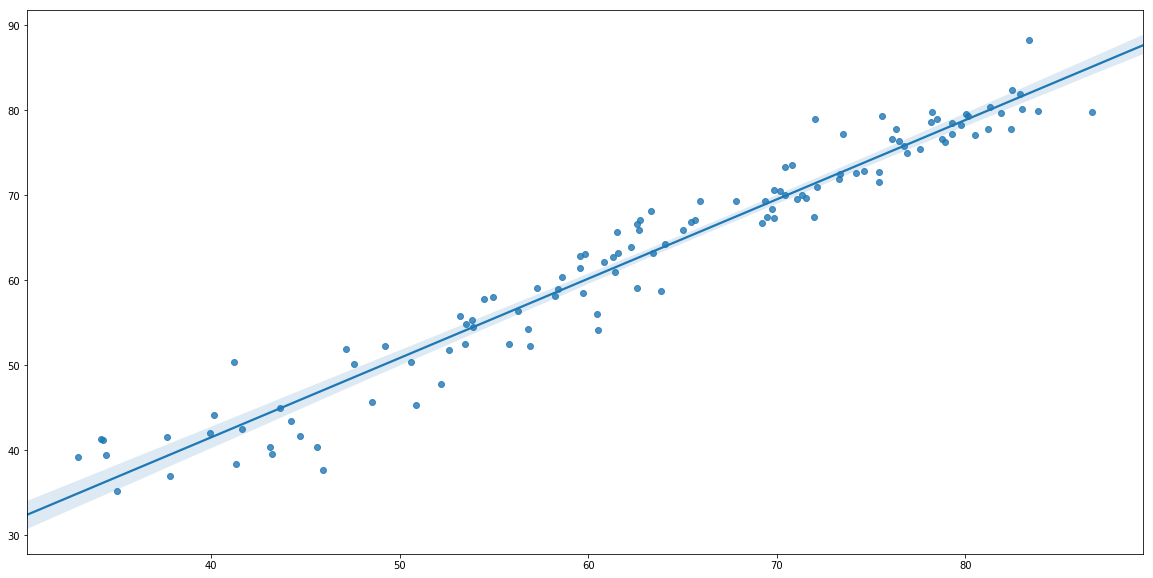

In [184]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [261]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[9]=['Setembro',len(data_mean_set),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1    Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2  Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3      Março            458  1.547816  0.000084   6.132166  1.534825   
4      Abril            461  1.721721  0.043022  11.308107  1.617951   
5       Maio            461  1.726099  0.000909   5.088715  1.268210   
6      Junho            467  1.762722  0.005796   8.222726  1.436187   
7      Julho            467  1.901074  0.020217   8.889674  1.617749   
8     Agosto            468  1.961629  0.010002   8.409422  1.755023   
9   Setembro            470  1.875915  0.054514   8.397614  1.670233   

   Variance  R2_score       MAE       MSE      MSLE     MedLE  
1  0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2  0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3  0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4  0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5  0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6  0.948497  0.947413  1.762722  5.169820  0.000991  1.538057  
7  0.952432  0.952266  1.901074  6.231194  0.001455  1.602243  
8  0.963129  0.963085  1.961629  6.928096  0.001824  1.588527  
9  0.967100  0.966860  1.875915  6.308735  0.001968  1.378761

In [262]:
pickle.dump(mlp,open('../Models/UR/ur_9.model','wb'))

## Outubro

In [263]:
data_mean_out = pd.read_csv('../Dados/Brasil_10_mean.csv')

In [188]:
data_mean_out.describe().T

count          mean          std  \
Altitude(metros)                            458.0    365.521834   282.831588   
Codigo OMM                                  458.0  85201.056769  2325.371846   
Day                                         458.0     16.061867     0.290188   
H(UTC)                                      458.0     11.560298     0.110060   
Latitude                                    458.0    -15.371909     8.276341   
Longitude                                   458.0    -48.015097     7.263208   
Month                                       458.0     10.000000     0.000000   
PRECIPITACAO (mm)                           458.0      0.131662     0.078302   
PRESSAO ATMOSFERICA (hPa)                   458.0    971.318067    31.162328   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            458.0    971.631985    31.171819   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            458.0    971.010566    31.154253   
TEMPERATURA DO AR (C)                       458.0     24.787277     3.360425   
TEMPERATURA DO PONTO DE ORVALHO (C)         458.0     17.259787     2.931861   
TEMPERATURA MAXIMA (C)                      458.0     25.460505     3.411434   
TEMPERATURA MINIMA (C)                      458.0     24.151605     3.312872   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  458.0     17.809413     2.904512   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  458.0     16.731545     2.962191   
UMIDADE RELATIVA DO AR (%)                  458.0     67.394833    10.752496   
UMIDADE RELATIVA DO MAXIMA AR (%)           458.0     70.232691    10.646891   
UMIDADE RELATIVA DO MINIMA AR (%)           458.0     64.508254    10.811372   
Year                                        458.0   2011.181547     1.201445   

                                                     min           25%  \
Altitude(metros)                                2.000000    108.250000   
Codigo OMM                                  81609.000000  81950.250000   
Day                                            15.217968     15.976132   
H(UTC)                                         11.120285     11.512070   
Latitude                                      -33.742297    -21.949157   
Longitude                                     -72.786778    -52.955566   
Month                                          10.000000     10.000000   
PRECIPITACAO (mm)                               0.000000      0.073523   
PRESSAO ATMOSFERICA (hPa)                     903.264795    949.499793   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              903.536344    949.811199   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              902.996984    949.191353   
TEMPERATURA DO AR (C)                          15.380845     23.136882   
TEMPERATURA DO PONTO DE ORVALHO (C)            11.459135     14.773931   
TEMPERATURA MAXIMA (C)                         15.942010     23.754457   
TEMPERATURA MINIMA (C)                         14.868564     22.497201   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     12.041271     15.347268   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     10.917662     14.237678   
UMIDADE RELATIVA DO AR (%)                     36.780605     60.756169   
UMIDADE RELATIVA DO MAXIMA AR (%)              38.777714     63.722175   
UMIDADE RELATIVA DO MINIMA AR (%)              34.786389     57.548358   
Year                                         2007.613196   2010.659632   

                                                     50%           75%  \
Altitude(metros)                              318.500000    557.250000   
Codigo OMM                                  86710.000000  86854.750000   
Day                                            16.022788     16.121040   
H(UTC)                                         11.524020     11.581455   
Latitude                                      -15.290187     -8.505388   
Longitude                                     -48.228444    -42.155827   
Month                                          10.000000     10.000000   
PRECIPITACAO (mm)                               0.128828      

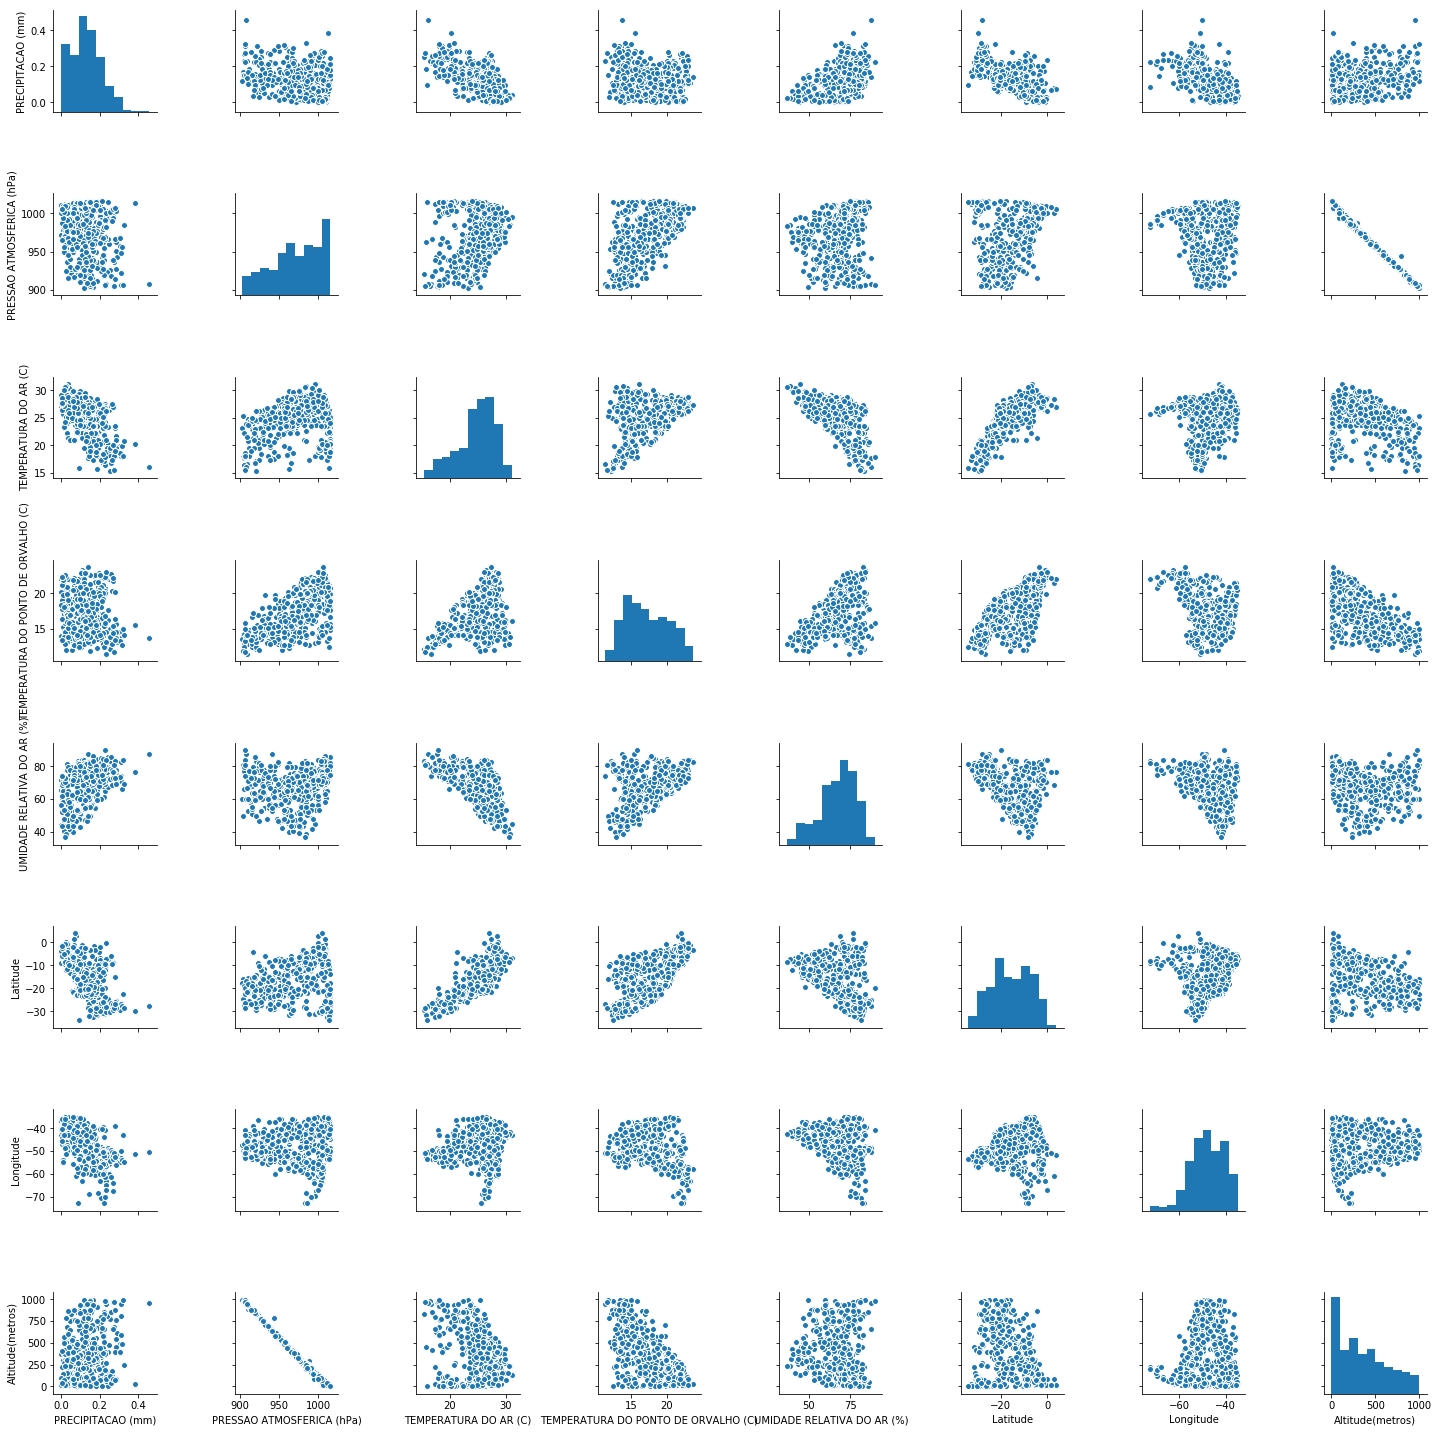

In [189]:
sns.pairplot(data_mean_out[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [274]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_out[features_UR_wanderlay], 
                                                    data_mean_out[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.954890726132734
MAE: 1.7023144577664484
MSE: 5.2018098382894875
MSLE: 0.001342893347591151
MedLE: 1.1745333847484218
R2 Score: 0.9540343895252046

Error(UR_true - UR_pred)

MIN: 0.02495626394930639 
MAX: 7.2332847425228195 
MEAN: 1.7023144577664484
Std: 1.5178719725882057


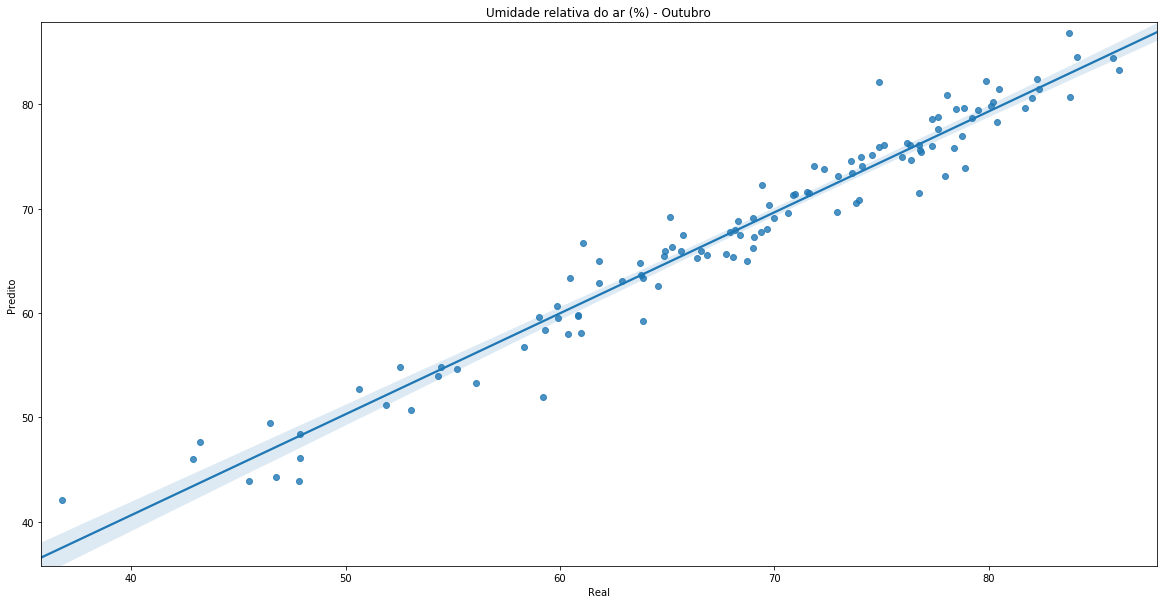

In [275]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Outubro')
plt.savefig('../Validacao/graph/UR_out.png')

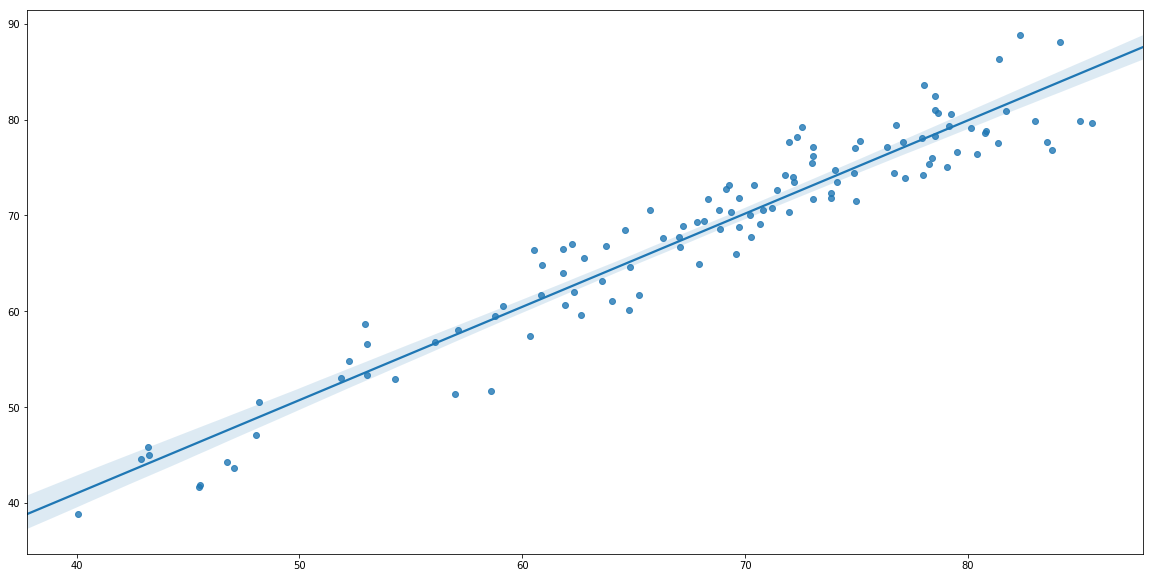

In [194]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [276]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[10]=['Outubro',len(data_mean_out),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1     Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2   Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3       Março            458  1.547816  0.000084   6.132166  1.534825   
4       Abril            461  1.721721  0.043022  11.308107  1.617951   
5        Maio            461  1.726099  0.000909   5.088715  1.268210   
6       Junho            467  1.762722  0.005796   8.222726  1.436187   
7       Julho            467  1.901074  0.020217   8.889674  1.617749   
8      Agosto            468  1.961629  0.010002   8.409422  1.755023   
9    Setembro            470  1.875915  0.054514   8.397614  1.670233   
10    Outubro            458  1.702314  0.024956   7.233285  1.517872   

    Variance  R2_score       MAE       MSE      MSLE     MedLE  
1   0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2   0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3   0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4   0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5   0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6   0.948497  0.947413  1.762722  5.169820  0.000991  1.538057  
7   0.952432  0.952266  1.901074  6.231194  0.001455  1.602243  
8   0.963129  0.963085  1.961629  6.928096  0.001824  1.588527  
9   0.967100  0.966860  1.875915  6.308735  0.001968  1.378761  
10  0.954891  0.954034  1.702314  5.201810  0.001343  1.174533

In [277]:
pickle.dump(mlp,open('../Models/UR/ur_10.model','wb'))

## Novembro

In [278]:
data_mean_nov = pd.read_csv('../Dados/Brasil_11_mean.csv')

In [198]:
data_mean_nov.describe().T

count          mean          std  \
Altitude(metros)                            459.0    364.728020   283.034068   
Codigo OMM                                  459.0  85204.355120  2323.906472   
Day                                         459.0     15.484228     0.694570   
H(UTC)                                      459.0     11.542632     0.556821   
Latitude                                    459.0    -15.372818     8.267324   
Longitude                                   459.0    -48.014903     7.255276   
Month                                       459.0     11.000000     0.000000   
PRECIPITACAO (mm)                           459.0      0.184631     0.105958   
PRESSAO ATMOSFERICA (hPa)                   459.0    969.885133    31.110715   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            459.0    969.944415    31.338606   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            459.0    969.346101    31.326944   
TEMPERATURA DO AR (C)                       459.0     24.944842     2.679654   
TEMPERATURA DO PONTO DE ORVALHO (C)         459.0     18.658136     2.533228   
TEMPERATURA MAXIMA (C)                      459.0     25.583118     2.698717   
TEMPERATURA MINIMA (C)                      459.0     24.345709     2.663624   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  459.0     19.204166     2.496933   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  459.0     18.136198     2.574007   
UMIDADE RELATIVA DO AR (%)                  459.0     71.554024     8.876729   
UMIDADE RELATIVA DO MAXIMA AR (%)           459.0     74.353495     8.744390   
UMIDADE RELATIVA DO MINIMA AR (%)           459.0     68.578776     8.879375   
Year                                        459.0   2011.144578     1.223185   

                                                     min           25%  \
Altitude(metros)                                1.161000    105.500000   
Codigo OMM                                  81609.000000  81950.500000   
Day                                             2.000000     15.446692   
H(UTC)                                          0.000000     11.500000   
Latitude                                      -33.742297    -21.917960   
Longitude                                     -72.786778    -52.947681   
Month                                          11.000000     11.000000   
PRECIPITACAO (mm)                               0.000000      0.101004   
PRESSAO ATMOSFERICA (hPa)                     901.802811    948.560477   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              886.100000    948.766735   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              885.400000    948.196881   
TEMPERATURA DO AR (C)                          17.529691     23.375919   
TEMPERATURA DO PONTO DE ORVALHO (C)            12.920065     16.871342   
TEMPERATURA MAXIMA (C)                         18.131706     24.014131   
TEMPERATURA MINIMA (C)                         16.943966     22.775846   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     13.462721     17.406219   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     12.372500     16.306796   
UMIDADE RELATIVA DO AR (%)                     38.376389     68.106220   
UMIDADE RELATIVA DO MAXIMA AR (%)              40.943056     71.176838   
UMIDADE RELATIVA DO MINIMA AR (%)              35.979167     64.988938   
Year                                         2004.000000   2010.601246   

                                                     50%           75%  \
Altitude(metros)                              313.000000    555.500000   
Codigo OMM                                  86711.000000  86854.500000   
Day                                            15.500000     15.613861   
H(UTC)                                         11.513941     11.591346   
Latitude                                      -15.300159     -8.506776   
Longitude                                     -48.201231    -42.164824   
Month                                          11.000000     11.000000   
PRECIPITACAO (mm)                               0.195137      

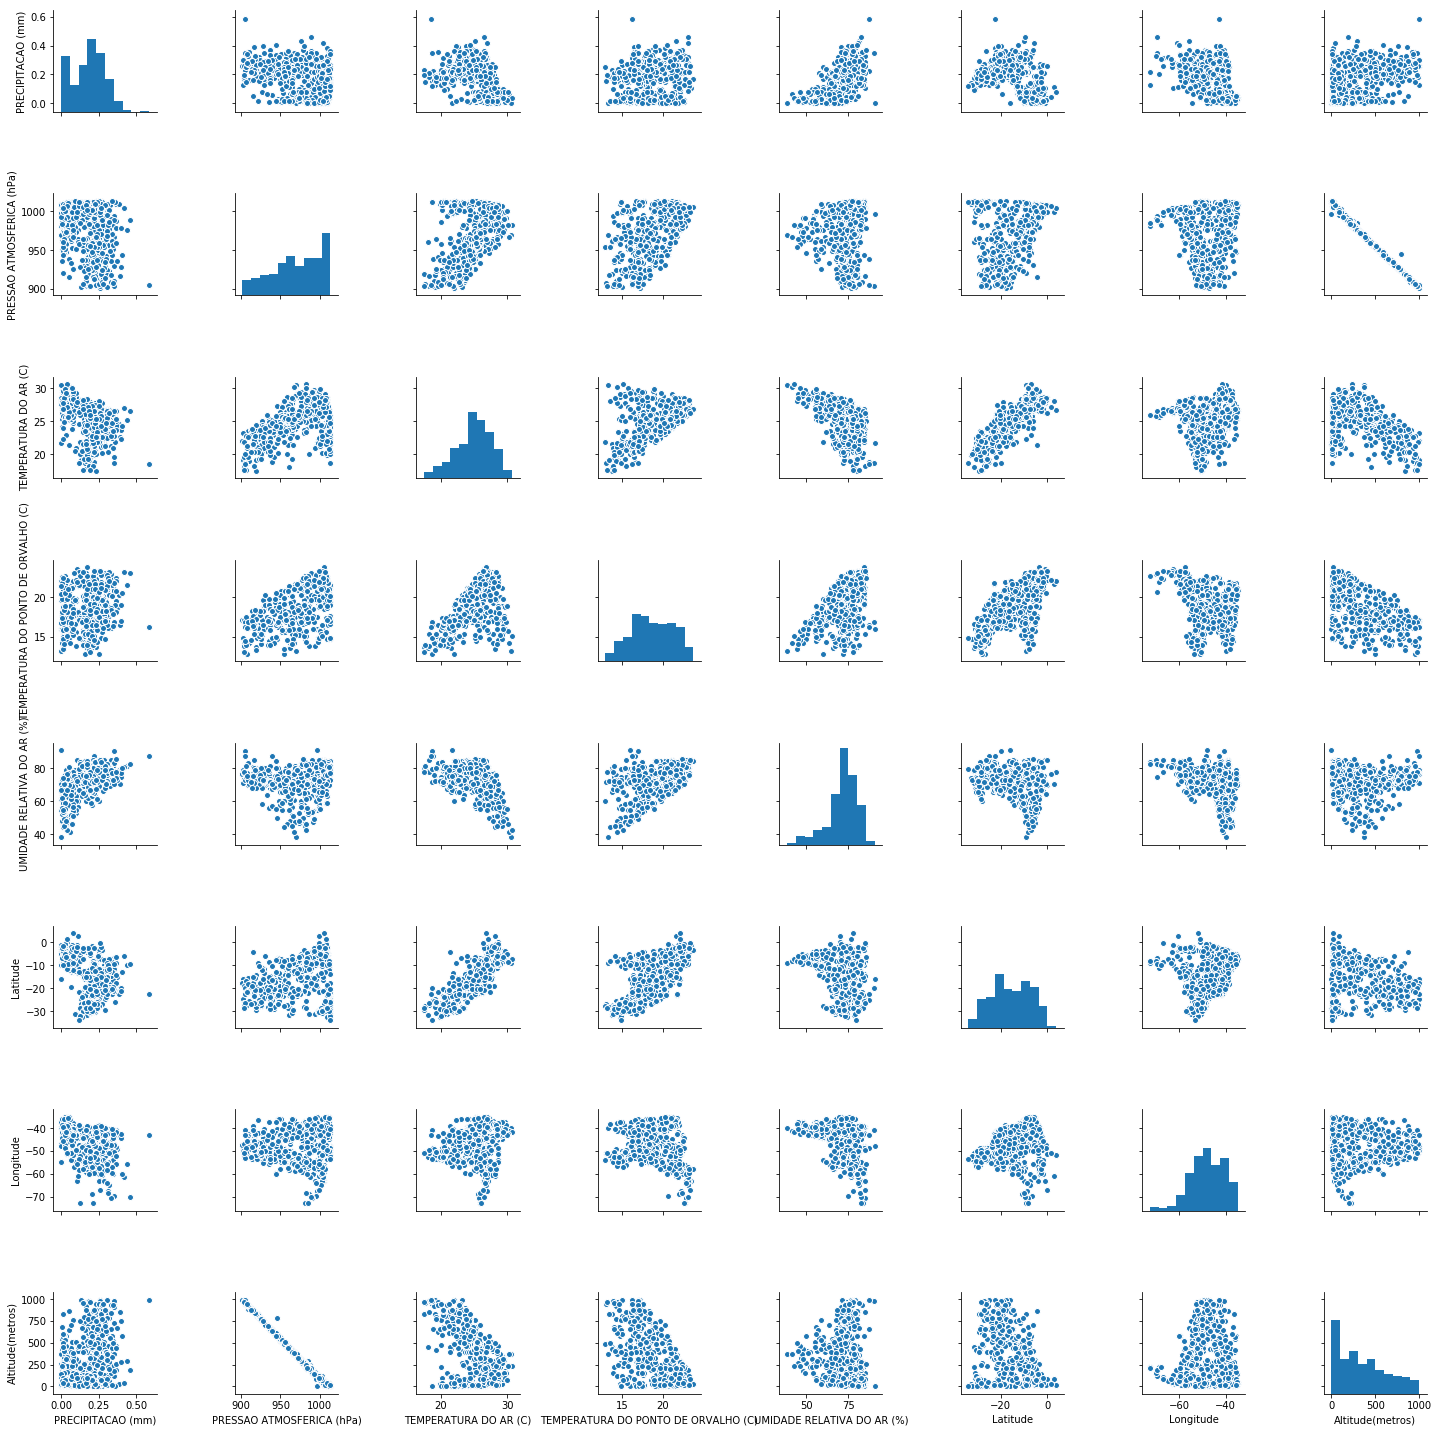

In [213]:
sns.pairplot(data_mean_nov[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [286]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_nov[features_UR_wanderlay], 
                                                    data_mean_nov[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9300230396710756
MAE: 1.926183219935601
MSE: 5.659172079066811
MSLE: 0.0011069419133259682
MedLE: 1.7058104797337421
R2 Score: 0.9293432338310214

Error(UR_true - UR_pred)

MIN: 0.022422169654660706 
MAX: 7.139630794397789 
MEAN: 1.926183219935601
Std: 1.3960624206335939


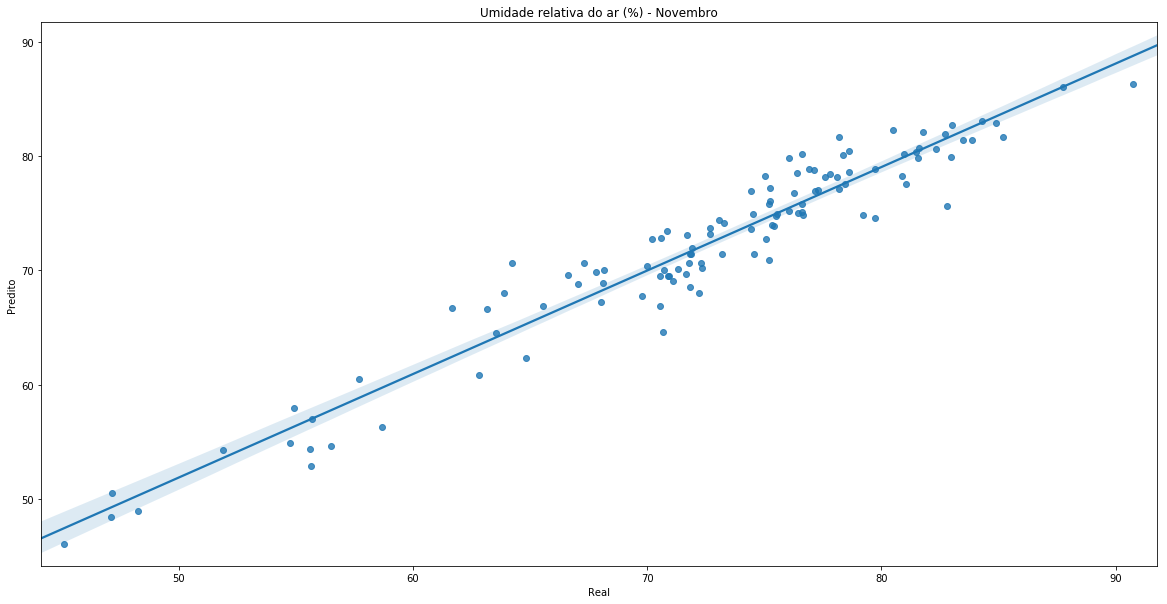

In [287]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Novembro')
plt.savefig('../Validacao/graph/UR_nov.png')

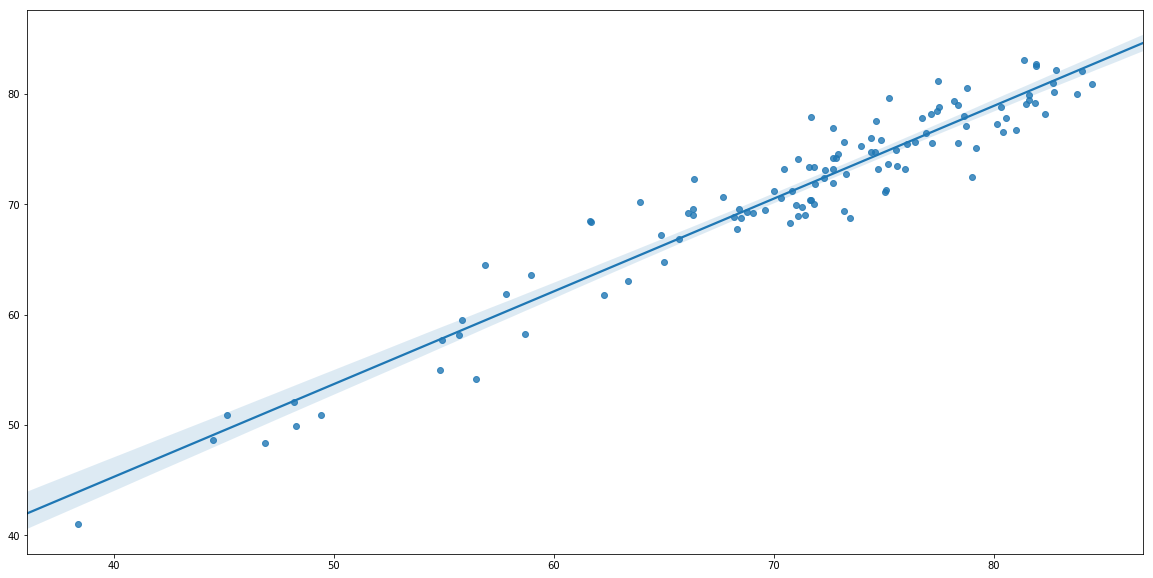

In [204]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [289]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[11]=['Novembro',len(data_mean_nov),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1     Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2   Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3       Março            458  1.547816  0.000084   6.132166  1.534825   
4       Abril            461  1.721721  0.043022  11.308107  1.617951   
5        Maio            461  1.726099  0.000909   5.088715  1.268210   
6       Junho            467  1.762722  0.005796   8.222726  1.436187   
7       Julho            467  1.901074  0.020217   8.889674  1.617749   
8      Agosto            468  1.961629  0.010002   8.409422  1.755023   
9    Setembro            470  1.875915  0.054514   8.397614  1.670233   
10    Outubro            458  1.702314  0.024956   7.233285  1.517872   
11   Novembro            459  1.926183  0.022422   7.139631  1.396062   

    Variance  R2_score       MAE       MSE      MSLE     MedLE  
1   0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2   0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3   0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4   0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5   0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6   0.948497  0.947413  1.762722  5.169820  0.000991  1.538057  
7   0.952432  0.952266  1.901074  6.231194  0.001455  1.602243  
8   0.963129  0.963085  1.961629  6.928096  0.001824  1.588527  
9   0.967100  0.966860  1.875915  6.308735  0.001968  1.378761  
10  0.954891  0.954034  1.702314  5.201810  0.001343  1.174533  
11  0.930023  0.929343  1.926183  5.659172  0.001107  1.705810

In [290]:
pickle.dump(mlp,open('../Models/UR/ur_11.model','wb'))

## Dezembro

In [291]:
data_mean_dez = pd.read_csv('../Dados/Brasil_12_mean.csv')

In [208]:
data_mean_dez.describe().T

count          mean          std  \
Altitude(metros)                            459.0    364.728020   283.034068   
Codigo OMM                                  459.0  85204.355120  2323.906472   
Day                                         459.0     15.993210     0.439737   
H(UTC)                                      459.0     11.571570     0.179161   
Latitude                                    459.0    -15.372818     8.267324   
Longitude                                   459.0    -48.014903     7.255276   
Month                                       459.0     12.000000     0.000000   
PRECIPITACAO (mm)                           459.0      0.214803     0.117253   
PRESSAO ATMOSFERICA (hPa)                   459.0    969.699576    31.029332   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            459.0    969.805423    31.279263   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            459.0    969.224192    31.265980   
TEMPERATURA DO AR (C)                       459.0     25.282343     2.099620   
TEMPERATURA DO PONTO DE ORVALHO (C)         459.0     19.575694     2.101069   
TEMPERATURA MAXIMA (C)                      459.0     25.913796     2.102324   
TEMPERATURA MINIMA (C)                      459.0     24.687777     2.101326   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  459.0     20.126134     2.057025   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  459.0     19.052587     2.146858   
UMIDADE RELATIVA DO AR (%)                  459.0     73.737590     7.958306   
UMIDADE RELATIVA DO MAXIMA AR (%)           459.0     76.544210     7.930446   
UMIDADE RELATIVA DO MINIMA AR (%)           459.0     70.714894     8.081012   
Year                                        459.0   2011.085482     1.226938   

                                                     min           25%  \
Altitude(metros)                                1.161000    105.500000   
Codigo OMM                                  81609.000000  81950.500000   
Day                                            14.483051     15.904517   
H(UTC)                                         10.000000     11.500000   
Latitude                                      -33.742297    -21.917960   
Longitude                                     -72.786778    -52.947681   
Month                                          12.000000     12.000000   
PRECIPITACAO (mm)                               0.004032      0.129100   
PRESSAO ATMOSFERICA (hPa)                     901.765483    948.476784   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              886.666667    948.414544   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              886.100000    947.888734   
TEMPERATURA DO AR (C)                          19.113212     24.007262   
TEMPERATURA DO PONTO DE ORVALHO (C)            13.033333     17.915857   
TEMPERATURA MAXIMA (C)                         19.718911     24.622935   
TEMPERATURA MINIMA (C)                         18.552799     23.369962   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     14.266667     18.485166   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     12.333333     17.371964   
UMIDADE RELATIVA DO AR (%)                     42.751344     70.698634   
UMIDADE RELATIVA DO MAXIMA AR (%)              45.165323     73.619529   
UMIDADE RELATIVA DO MINIMA AR (%)              40.321237     67.263769   
Year                                         2005.000000   2010.527942   

                                                     50%           75%  \
Altitude(metros)                              313.000000    555.500000   
Codigo OMM                                  86711.000000  86854.500000   
Day                                            16.000000     16.041821   
H(UTC)                                         11.511226     11.587442   
Latitude                                      -15.300159     -8.506776   
Longitude                                     -48.201231    -42.164824   
Month                                          12.000000     12.000000   
PRECIPITACAO (mm)                               0.218265      

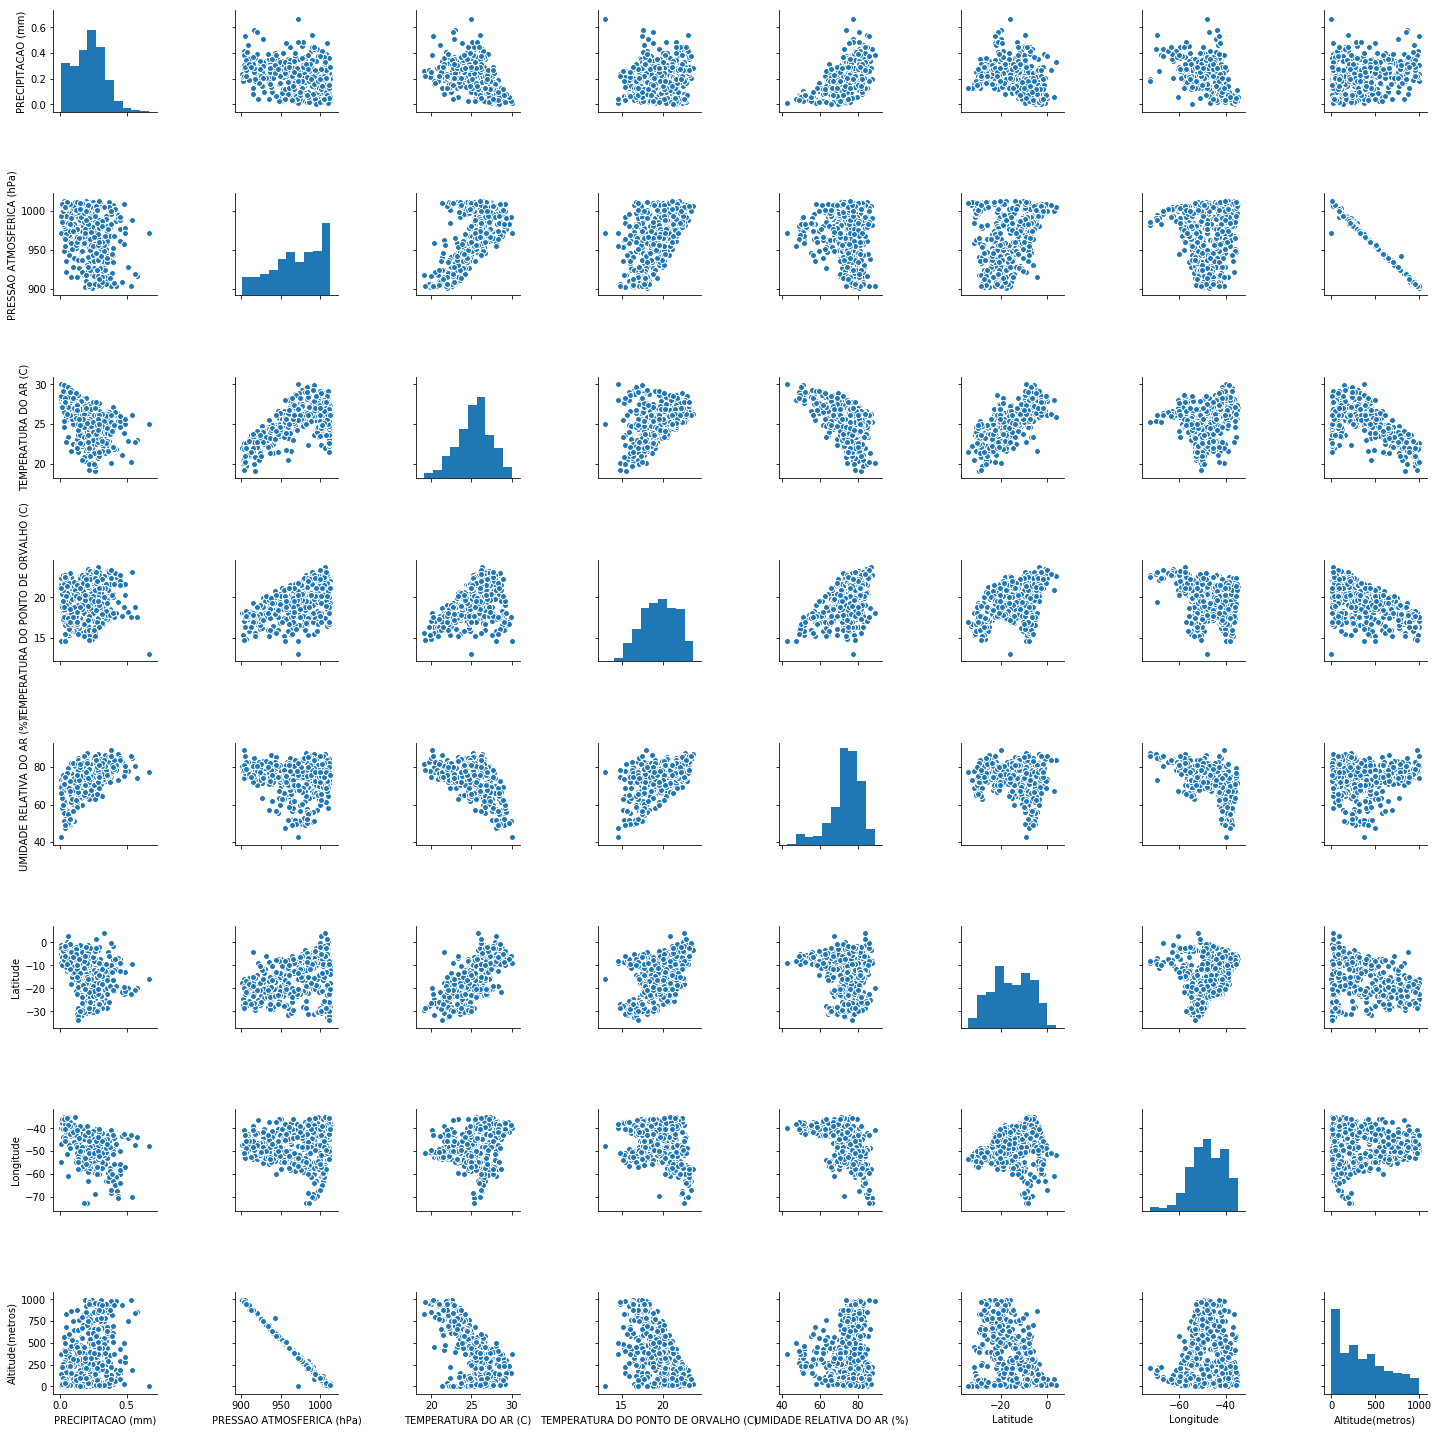

In [232]:
sns.pairplot(data_mean_dez[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [296]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_dez[features_UR_wanderlay], 
                                                    data_mean_dez[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9144887728111123
MAE: 2.026623540088407
MSE: 6.8457477589844595
MSLE: 0.001314013560210787
MedLE: 1.8531135182632923
R2 Score: 0.9144862900070719

Error(UR_true - UR_pred)

MIN: 0.004925098668778105 
MAX: 10.840447945594192 
MEAN: 2.026623540088407
Std: 1.6548549138048305


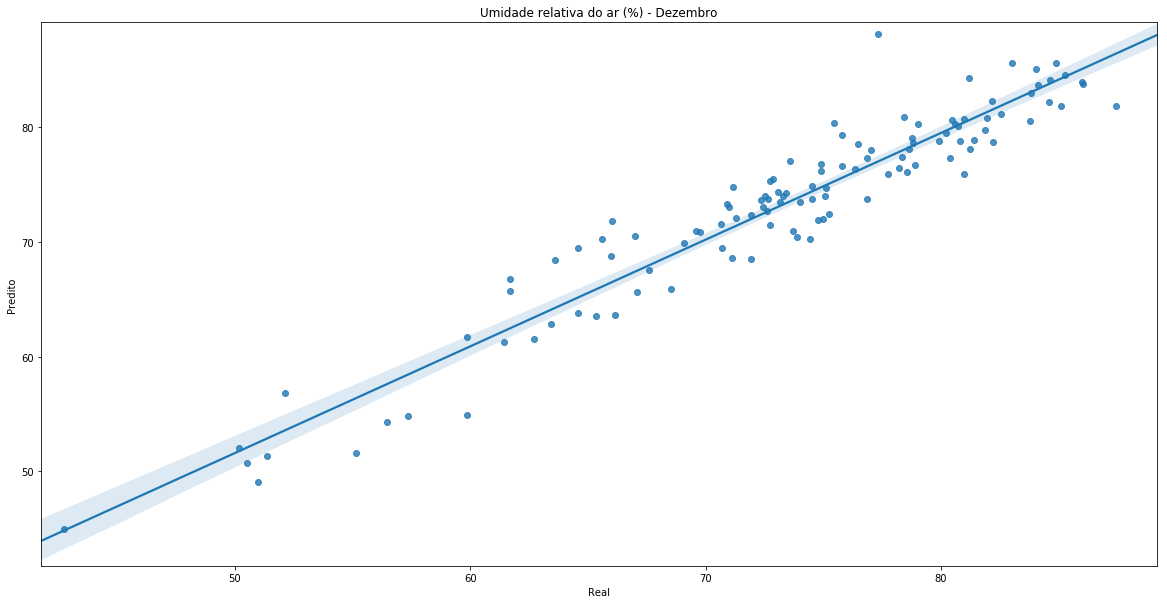

In [297]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Umidade relativa do ar (%) - Dezembro')
plt.savefig('../Validacao/graph/UR_dez.png')

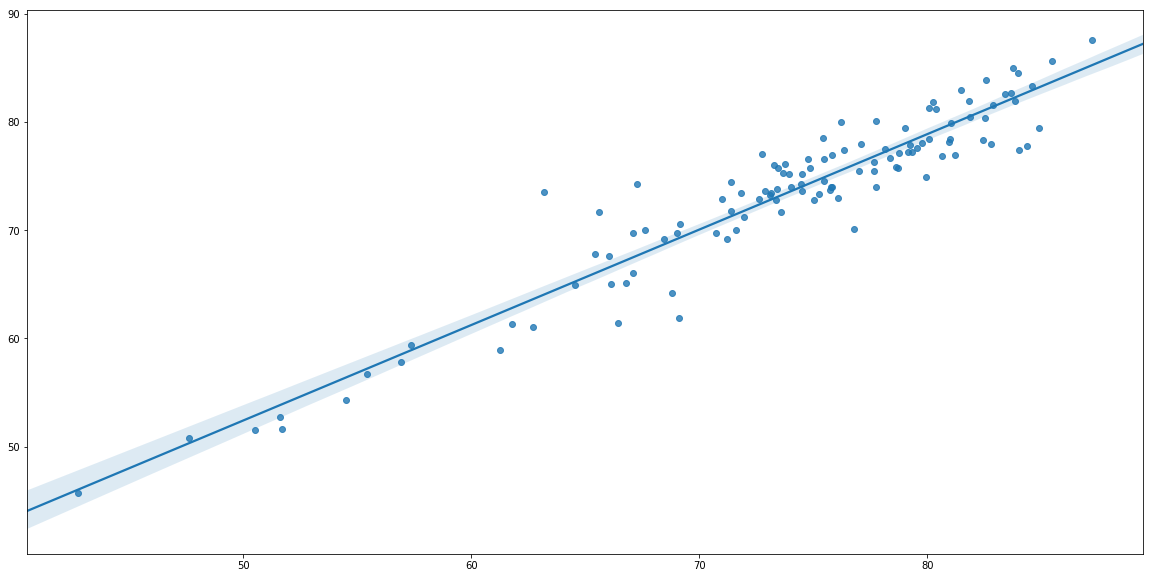

In [216]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [298]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[12]=['Dezembro',len(data_mean_dez),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1     Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2   Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3       Março            458  1.547816  0.000084   6.132166  1.534825   
4       Abril            461  1.721721  0.043022  11.308107  1.617951   
5        Maio            461  1.726099  0.000909   5.088715  1.268210   
6       Junho            467  1.762722  0.005796   8.222726  1.436187   
7       Julho            467  1.901074  0.020217   8.889674  1.617749   
8      Agosto            468  1.961629  0.010002   8.409422  1.755023   
9    Setembro            470  1.875915  0.054514   8.397614  1.670233   
10    Outubro            458  1.702314  0.024956   7.233285  1.517872   
11   Novembro            459  1.926183  0.022422   7.139631  1.396062   
12   Dezembro            459  2.026624  0.004925  10.840448  1.654855   

    Variance  R2_score       MAE       MSE      MSLE     MedLE  
1   0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2   0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3   0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4   0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5   0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6   0.948497  0.947413  1.762722  5.169820  0.000991  1.538057  
7   0.952432  0.952266  1.901074  6.231194  0.001455  1.602243  
8   0.963129  0.963085  1.961629  6.928096  0.001824  1.588527  
9   0.967100  0.966860  1.875915  6.308735  0.001968  1.378761  
10  0.954891  0.954034  1.702314  5.201810  0.001343  1.174533  
11  0.930023  0.929343  1.926183  5.659172  0.001107  1.705810  
12  0.914489  0.914486  2.026624  6.845748  0.001314  1.853114

In [299]:
pickle.dump(mlp,open('../Models/UR/ur_12.model','wb'))

### Salvando as mestricas de avaliação

In [302]:
data_ur_erros.to_csv('../Validacao/UR.csv',float_format='%.3f')

In [301]:
data_ur_erros

Month  Qto_Estacioes   ER_mean    ER_min     ER_max    ER_std  \
1     Janeiro            458  1.674234  0.005650   5.695131  1.248353   
2   Fevereiro            458  1.673254  0.014731   6.544560  1.390854   
3       Março            458  1.547816  0.000084   6.132166  1.534825   
4       Abril            461  1.721721  0.043022  11.308107  1.617951   
5        Maio            461  1.726099  0.000909   5.088715  1.268210   
6       Junho            467  1.762722  0.005796   8.222726  1.436187   
7       Julho            467  1.901074  0.020217   8.889674  1.617749   
8      Agosto            468  1.961629  0.010002   8.409422  1.755023   
9    Setembro            470  1.875915  0.054514   8.397614  1.670233   
10    Outubro            458  1.702314  0.024956   7.233285  1.517872   
11   Novembro            459  1.926183  0.022422   7.139631  1.396062   
12   Dezembro            459  2.026624  0.004925  10.840448  1.654855   

    Variance  R2_score       MAE       MSE      MSLE     MedLE  
1   0.913741  0.912037  1.674234  4.361445  0.000801  1.358151  
2   0.902203  0.884074  1.673254  4.734254  0.000831  1.282638  
3   0.890648  0.886024  1.547816  4.751422  0.000821  0.973038  
4   0.852701  0.851462  1.721721  5.582088  0.000963  1.404324  
5   0.923103  0.919993  1.726099  4.587775  0.000843  1.465992  
6   0.948497  0.947413  1.762722  5.169820  0.000991  1.538057  
7   0.952432  0.952266  1.901074  6.231194  0.001455  1.602243  
8   0.963129  0.963085  1.961629  6.928096  0.001824  1.588527  
9   0.967100  0.966860  1.875915  6.308735  0.001968  1.378761  
10  0.954891  0.954034  1.702314  5.201810  0.001343  1.174533  
11  0.930023  0.929343  1.926183  5.659172  0.001107  1.705810  
12  0.914489  0.914486  2.026624  6.845748  0.001314  1.853114